In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import tensorflow as tf

In [2]:
df = pd.read_csv('data/ossl_all_L0_v1.2.csv')

C:\Users\KORISNIK\AppData\Local\Temp\ipykernel_10832\2291480009.py:1: DtypeWarning: Columns (1,4,5,6,15,16,17,21,25,62,111,112,113,114,115,116,117,118,119,120,121,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/ossl_all_L0_v1.2.csv')


In [3]:
mir_columns = []
visnir_columns = []

mir_wavelengths = []
visnir_wavelengths = []

for column in df.columns:
    if 'scan_mir' in column:
        mir_columns.append(column)
        mir_wavelengths.append(column[9:len(column)-4])
    elif 'scan_visnir' in column:
        visnir_columns.append(column)
        visnir_wavelengths.append(column[12:len(column)-4])

# CLAY

## KSSL MIR

In [84]:
columns = []
columns.append('clay.tot_usda.a334_w.pct')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,clay.tot_usda.a334_w.pct,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,28.18974,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,35.69188,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,46.83406,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,41.82922,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,35.48168,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,14.00321,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,11.33887,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,23.35984,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,24.88940,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [85]:
X = pd.DataFrame(data=data[mir_columns], columns=mir_columns)
y = data['clay.tot_usda.a334_w.pct']
feature_columns = X.shape[1]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [52]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.InputLayer(shape=(feature_columns, 1)),
    
    tf.keras.layers.Conv1D(filters=32, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    
    tf.keras.layers.Conv1D(filters=64, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=128, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=256, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=100, activation='relu'),
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(units=1, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score(), tf.keras.metrics.MeanAbsoluteError()])

In [53]:
model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

Epoch 1/20
587/587 ━━━━━━━━━━━━━━━━━━━━ 92s 154ms/step - loss: 204.4300 - mean_absolute_error: 10.5554 - r2_score: 0.2061 - root_mean_squared_error: 14.1155
Epoch 2/20
587/587 ━━━━━━━━━━━━━━━━━━━━ 90s 152ms/step - loss: 86.4218 - mean_absolute_error: 6.4291 - r2_score: 0.6694 - root_mean_squared_error: 9.2870
Epoch 3/20
587/587 ━━━━━━━━━━━━━━━━━━━━ 89s 151ms/step - loss: 66.3116 - mean_absolute_error: 5.5588 - r2_score: 0.7454 - root_mean_squared_error: 8.1424
Epoch 4/20
587/587 ━━━━━━━━━━━━━━━━━━━━ 88s 150ms/step - loss: 64.8154 - mean_absolute_error: 5.5112 - r2_score: 0.7512 - root_mean_squared_error: 8.0413
Epoch 5/20
587/587 ━━━━━━━━━━━━━━━━━━━━ 88s 150ms/step - loss: 62.9802 - mean_absolute_error: 5.4199 - r2_score: 0.7604 - root_mean_squared_error: 7.8941
Epoch 6/20
587/587 ━━━━━━━━━━━━━━━━━━━━ 85s 145ms/step - loss: 47.7293 - mean_absolute_error: 4.7440 - r2_score: 0.8173 - root_mean_squared_error: 6.9075
Epoch 7/20
587/587 ━━━━━━━━━━━━━━━━━━━━ 86s 146ms/step - loss: 47.6423 - 

[21.57868194580078, 4.6452860832214355, 0.9180341958999634, 2.9718241691589355]

391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step
RMSE: 21.578684026338223
R^2: 0.9180342307119258
bias: 2.9718253166145376
RPIQ: 1.0249322847227624


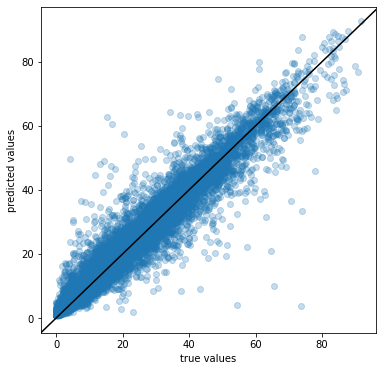

In [55]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## LUCAS VisNIR

In [88]:
columns = []
columns.append('clay.tot_iso.11277_w.pct')
for column in visnir_columns[25:]:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'LUCAS.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,clay.tot_iso.11277_w.pct,scan_visnir.400_ref,scan_visnir.402_ref,scan_visnir.404_ref,scan_visnir.406_ref,scan_visnir.408_ref,scan_visnir.410_ref,scan_visnir.412_ref,scan_visnir.414_ref,scan_visnir.416_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
95476,7.0,0.147331,0.137725,0.129233,0.122038,0.116199,0.111652,0.108249,0.105793,0.104077,...,0.281269,0.281066,0.280881,0.280715,0.280566,0.280457,0.280389,0.280337,0.280321,0.280355
95477,13.0,0.196777,0.181492,0.168124,0.156923,0.147937,0.141014,0.135856,0.132139,0.129554,...,0.380431,0.379638,0.378879,0.378168,0.377544,0.377009,0.376543,0.376147,0.375830,0.375504
95478,40.0,0.215656,0.196448,0.179823,0.165995,0.154917,0.146328,0.139857,0.135119,0.131746,...,0.379886,0.378946,0.378047,0.377186,0.376361,0.375612,0.374935,0.374315,0.373759,0.373110
95479,26.0,0.200385,0.185616,0.172716,0.161951,0.153353,0.146730,0.141793,0.138226,0.135729,...,0.260330,0.259418,0.258505,0.257603,0.256744,0.255934,0.255173,0.254467,0.253815,0.253045
95480,22.0,0.211138,0.193811,0.178648,0.165877,0.155546,0.147513,0.141501,0.137160,0.134128,...,0.401367,0.400499,0.399693,0.398964,0.398307,0.397749,0.397298,0.396927,0.396609,0.396239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135646,50.0,0.134596,0.123176,0.113366,0.105305,0.098835,0.093753,0.089851,0.086902,0.084672,...,0.238452,0.237691,0.236922,0.236146,0.235420,0.234750,0.234165,0.233656,0.233179,0.232499
135647,32.0,0.146498,0.133158,0.121717,0.112330,0.104832,0.098949,0.094392,0.090915,0.088276,...,0.286538,0.285587,0.284676,0.283814,0.282987,0.282239,0.281584,0.280977,0.280416,0.279644
135648,34.0,0.141685,0.130641,0.121164,0.113433,0.107294,0.102510,0.098863,0.096139,0.094123,...,0.234215,0.233401,0.232597,0.231818,0.231075,0.230400,0.229796,0.229211,0.228687,0.228053
135649,10.0,0.142072,0.131503,0.122369,0.114908,0.109030,0.104478,0.101000,0.098400,0.096492,...,0.289042,0.288496,0.287980,0.287488,0.287001,0.286541,0.286125,0.285737,0.285374,0.284905


In [89]:
X = pd.DataFrame(data=data[visnir_columns[25:]], columns=visnir_columns[25:])
y = data['clay.tot_iso.11277_w.pct']
feature_columns = X.shape[1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [7]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.InputLayer(shape=(feature_columns, 1)),
    
    tf.keras.layers.Conv1D(filters=32, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    
    tf.keras.layers.Conv1D(filters=64, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=128, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=256, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=100, activation='relu'),
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(units=1, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score(), tf.keras.metrics.MeanAbsoluteError()])

In [8]:
model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

Epoch 1/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - loss: 208.5474 - mean_absolute_error: 11.2202 - r2_score: -0.2599 - root_mean_squared_error: 14.3382
Epoch 2/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - loss: 163.7239 - mean_absolute_error: 10.0839 - r2_score: -0.0062 - root_mean_squared_error: 12.7951
Epoch 3/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 163.5420 - mean_absolute_error: 10.0949 - r2_score: -0.0082 - root_mean_squared_error: 12.7872
Epoch 4/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - loss: 163.8959 - mean_absolute_error: 10.0523 - r2_score: 0.0079 - root_mean_squared_error: 12.8013
Epoch 5/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - loss: 162.5297 - mean_absolute_error: 10.0459 - r2_score: 0.0117 - root_mean_squared_error: 12.7480
Epoch 6/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - loss: 147.2992 - mean_absolute_error: 9.4077 - r2_score: 0.1219 - root_mean_squared_error: 12.1340
Epoch 7/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - loss: 

[80.3409194946289, 8.963309288024902, 0.4901010990142822, 6.668670177459717]

177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
RMSE: 80.34093589253281
R^2: 0.4901009252591042
bias: 6.668668322763783
RPIQ: 0.1475666562841448


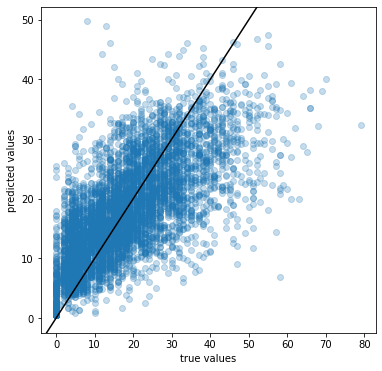

In [9]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# SAND

## KSSL MIR

In [70]:
columns = []
columns.append('sand.tot_usda.c60_w.pct')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,sand.tot_usda.c60_w.pct,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,31.3,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,31.3,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,24.8,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,27.0,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,31.1,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,59.5,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,67.6,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,40.1,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,23.6,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [71]:
X = pd.DataFrame(data=data[mir_columns], columns=mir_columns)
y = data['sand.tot_usda.c60_w.pct']
feature_columns = X.shape[1]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [73]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.InputLayer(shape=(feature_columns, 1)),
    
    tf.keras.layers.Conv1D(filters=32, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    
    tf.keras.layers.Conv1D(filters=64, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=128, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=256, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=100, activation='relu'),
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(units=1, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score(), tf.keras.metrics.MeanAbsoluteError()])

In [74]:
model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

Epoch 1/20
571/571 ━━━━━━━━━━━━━━━━━━━━ 83s 142ms/step - loss: 753.5815 - mean_absolute_error: 22.1842 - r2_score: 0.1078 - root_mean_squared_error: 27.2320
Epoch 2/20
571/571 ━━━━━━━━━━━━━━━━━━━━ 86s 150ms/step - loss: 433.3193 - mean_absolute_error: 16.9476 - r2_score: 0.4896 - root_mean_squared_error: 20.8050
Epoch 3/20
571/571 ━━━━━━━━━━━━━━━━━━━━ 86s 150ms/step - loss: 305.3940 - mean_absolute_error: 13.8981 - r2_score: 0.6396 - root_mean_squared_error: 17.4720
Epoch 4/20
571/571 ━━━━━━━━━━━━━━━━━━━━ 86s 150ms/step - loss: 243.1326 - mean_absolute_error: 12.1455 - r2_score: 0.7122 - root_mean_squared_error: 15.5906
Epoch 5/20
571/571 ━━━━━━━━━━━━━━━━━━━━ 86s 150ms/step - loss: 200.0531 - mean_absolute_error: 10.8600 - r2_score: 0.7643 - root_mean_squared_error: 14.1428
Epoch 6/20
571/571 ━━━━━━━━━━━━━━━━━━━━ 86s 151ms/step - loss: 174.6562 - mean_absolute_error: 10.0431 - r2_score: 0.7932 - root_mean_squared_error: 13.2120
Epoch 7/20
571/571 ━━━━━━━━━━━━━━━━━━━━ 86s 151ms/step - l

[73.72505187988281, 8.586329460144043, 0.9122239351272583, 6.003425598144531]

381/381 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step
RMSE: 73.72505781718725
R^2: 0.9122238308001482
bias: 6.003424939417955
RPIQ: 0.6627680683001718


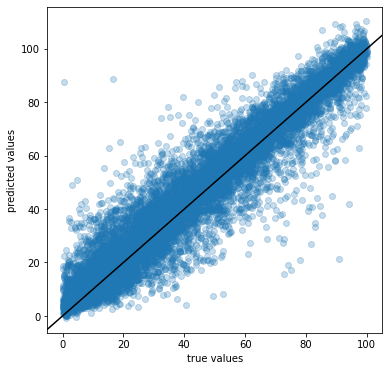

In [75]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## LUCAS VisNIR

In [27]:
columns = []
columns.append('sand.tot_iso.11277_w.pct')
for column in visnir_columns[25:]:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'LUCAS.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,sand.tot_iso.11277_w.pct,scan_visnir.400_ref,scan_visnir.402_ref,scan_visnir.404_ref,scan_visnir.406_ref,scan_visnir.408_ref,scan_visnir.410_ref,scan_visnir.412_ref,scan_visnir.414_ref,scan_visnir.416_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
95476,48.0,0.147331,0.137725,0.129233,0.122038,0.116199,0.111652,0.108249,0.105793,0.104077,...,0.281269,0.281066,0.280881,0.280715,0.280566,0.280457,0.280389,0.280337,0.280321,0.280355
95477,60.0,0.196777,0.181492,0.168124,0.156923,0.147937,0.141014,0.135856,0.132139,0.129554,...,0.380431,0.379638,0.378879,0.378168,0.377544,0.377009,0.376543,0.376147,0.375830,0.375504
95478,8.0,0.215656,0.196448,0.179823,0.165995,0.154917,0.146328,0.139857,0.135119,0.131746,...,0.379886,0.378946,0.378047,0.377186,0.376361,0.375612,0.374935,0.374315,0.373759,0.373110
95479,56.0,0.200385,0.185616,0.172716,0.161951,0.153353,0.146730,0.141793,0.138226,0.135729,...,0.260330,0.259418,0.258505,0.257603,0.256744,0.255934,0.255173,0.254467,0.253815,0.253045
95480,37.0,0.211138,0.193811,0.178648,0.165877,0.155546,0.147513,0.141501,0.137160,0.134128,...,0.401367,0.400499,0.399693,0.398964,0.398307,0.397749,0.397298,0.396927,0.396609,0.396239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135646,23.0,0.134596,0.123176,0.113366,0.105305,0.098835,0.093753,0.089851,0.086902,0.084672,...,0.238452,0.237691,0.236922,0.236146,0.235420,0.234750,0.234165,0.233656,0.233179,0.232499
135647,39.0,0.146498,0.133158,0.121717,0.112330,0.104832,0.098949,0.094392,0.090915,0.088276,...,0.286538,0.285587,0.284676,0.283814,0.282987,0.282239,0.281584,0.280977,0.280416,0.279644
135648,43.0,0.141685,0.130641,0.121164,0.113433,0.107294,0.102510,0.098863,0.096139,0.094123,...,0.234215,0.233401,0.232597,0.231818,0.231075,0.230400,0.229796,0.229211,0.228687,0.228053
135649,79.0,0.142072,0.131503,0.122369,0.114908,0.109030,0.104478,0.101000,0.098400,0.096492,...,0.289042,0.288496,0.287980,0.287488,0.287001,0.286541,0.286125,0.285737,0.285374,0.284905


In [28]:
X = pd.DataFrame(data=data[visnir_columns[25:]], columns=visnir_columns[25:])
y = data['sand.tot_iso.11277_w.pct']
feature_columns = X.shape[1]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [30]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.InputLayer(shape=(feature_columns, 1)),
    
    tf.keras.layers.Conv1D(filters=32, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    
    tf.keras.layers.Conv1D(filters=64, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=128, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=256, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=100, activation='relu'),
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(units=1, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score(), tf.keras.metrics.MeanAbsoluteError()])

In [31]:
model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

Epoch 1/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - loss: 1074.9607 - mean_absolute_error: 26.7831 - r2_score: -0.6355 - root_mean_squared_error: 32.4799
Epoch 2/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - loss: 673.9111 - mean_absolute_error: 21.7619 - r2_score: -0.0131 - root_mean_squared_error: 25.9590
Epoch 3/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - loss: 671.8826 - mean_absolute_error: 21.7024 - r2_score: -0.0188 - root_mean_squared_error: 25.9203
Epoch 4/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 14s 51ms/step - loss: 668.5325 - mean_absolute_error: 21.6707 - r2_score: -0.0062 - root_mean_squared_error: 25.8552
Epoch 5/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - loss: 659.4469 - mean_absolute_error: 21.5661 - r2_score: -0.0031 - root_mean_squared_error: 25.6781
Epoch 6/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - loss: 650.8990 - mean_absolute_error: 21.4001 - r2_score: 0.0165 - root_mean_squared_error: 25.5115
Epoch 7/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - lo

[487.3389587402344,
 22.075754165649414,
 0.29353177547454834,
 18.248775482177734]

177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
RMSE: 487.33897215491777
R^2: 0.2935316283665871
bias: 18.248771873860104
RPIQ: 0.0355567829629856


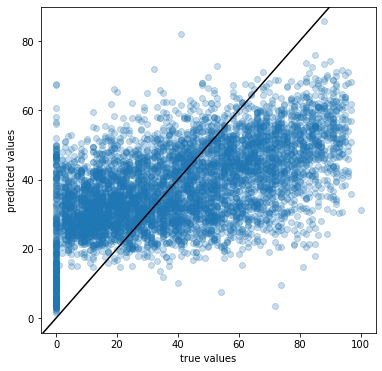

In [32]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

In [33]:
model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

Epoch 1/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - loss: 502.9512 - mean_absolute_error: 18.3485 - r2_score: 0.2384 - root_mean_squared_error: 22.4248
Epoch 2/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - loss: 503.1222 - mean_absolute_error: 18.2948 - r2_score: 0.2501 - root_mean_squared_error: 22.4282
Epoch 3/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - loss: 501.5816 - mean_absolute_error: 18.3288 - r2_score: 0.2451 - root_mean_squared_error: 22.3957
Epoch 4/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - loss: 490.9080 - mean_absolute_error: 18.1181 - r2_score: 0.2498 - root_mean_squared_error: 22.1559
Epoch 5/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - loss: 482.0630 - mean_absolute_error: 17.9337 - r2_score: 0.2661 - root_mean_squared_error: 21.9555
Epoch 6/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - loss: 482.6443 - mean_absolute_error: 17.9042 - r2_score: 0.2729 - root_mean_squared_error: 21.9685
Epoch 7/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - loss: 47

[418.27313232421875,
 20.45172691345215,
 0.39365267753601074,
 16.446102142333984]

177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
RMSE: 418.27308756997326
R^2: 0.39365262382565014
bias: 16.446103420502595
RPIQ: 0.051082299489445676


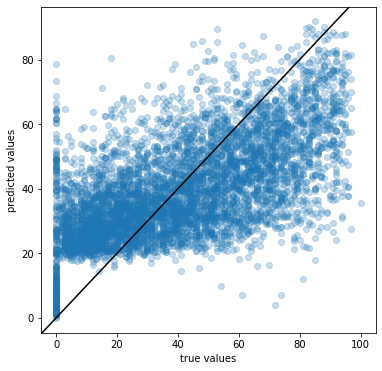

In [34]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# SILT

## KSSL MIR

In [85]:
columns = []
columns.append('silt.tot_usda.c62_w.pct')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,silt.tot_usda.c62_w.pct,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,40.5,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,33.0,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,28.4,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,31.2,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,33.4,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,26.5,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,21.1,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,36.5,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,51.5,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [86]:
X = pd.DataFrame(data=data[mir_columns], columns=mir_columns)
y = data['silt.tot_usda.c62_w.pct']
feature_columns = X.shape[1]

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [88]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.InputLayer(shape=(feature_columns, 1)),
    
    tf.keras.layers.Conv1D(filters=32, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    
    tf.keras.layers.Conv1D(filters=64, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=128, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=256, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=100, activation='relu'),
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(units=1, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score(), tf.keras.metrics.MeanAbsoluteError()])

In [89]:
model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

Epoch 1/20
571/571 ━━━━━━━━━━━━━━━━━━━━ 87s 150ms/step - loss: 493.6789 - mean_absolute_error: 17.9632 - r2_score: -0.1784 - root_mean_squared_error: 22.0425
Epoch 2/20
571/571 ━━━━━━━━━━━━━━━━━━━━ 89s 156ms/step - loss: 316.1948 - mean_absolute_error: 14.2457 - r2_score: 0.2369 - root_mean_squared_error: 17.7797
Epoch 3/20
571/571 ━━━━━━━━━━━━━━━━━━━━ 86s 151ms/step - loss: 253.3835 - mean_absolute_error: 12.5731 - r2_score: 0.3838 - root_mean_squared_error: 15.9151
Epoch 4/20
571/571 ━━━━━━━━━━━━━━━━━━━━ 86s 151ms/step - loss: 204.0416 - mean_absolute_error: 11.1524 - r2_score: 0.5094 - root_mean_squared_error: 14.2837
Epoch 5/20
571/571 ━━━━━━━━━━━━━━━━━━━━ 87s 153ms/step - loss: 175.6002 - mean_absolute_error: 10.2100 - r2_score: 0.5759 - root_mean_squared_error: 13.2504
Epoch 6/20
571/571 ━━━━━━━━━━━━━━━━━━━━ 87s 152ms/step - loss: 157.0237 - mean_absolute_error: 9.6224 - r2_score: 0.6205 - root_mean_squared_error: 12.5302
Epoch 7/20
571/571 ━━━━━━━━━━━━━━━━━━━━ 88s 153ms/step - l

[75.34832000732422, 8.680340766906738, 0.8197230696678162, 6.347894191741943]

381/381 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step
RMSE: 75.34831849322735
R^2: 0.819722493407374
bias: 6.347893685748412
RPIQ: 0.3676910287529162


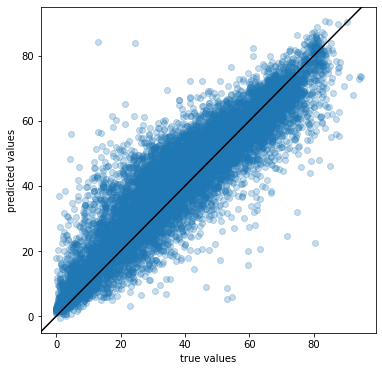

In [90]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## LUCAS VisNIR

In [19]:
columns = []
columns.append('silt.tot_iso.11277_w.pct')
for column in visnir_columns[25:]:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'LUCAS.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,silt.tot_iso.11277_w.pct,scan_visnir.400_ref,scan_visnir.402_ref,scan_visnir.404_ref,scan_visnir.406_ref,scan_visnir.408_ref,scan_visnir.410_ref,scan_visnir.412_ref,scan_visnir.414_ref,scan_visnir.416_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
95476,45.0,0.147331,0.137725,0.129233,0.122038,0.116199,0.111652,0.108249,0.105793,0.104077,...,0.281269,0.281066,0.280881,0.280715,0.280566,0.280457,0.280389,0.280337,0.280321,0.280355
95477,27.0,0.196777,0.181492,0.168124,0.156923,0.147937,0.141014,0.135856,0.132139,0.129554,...,0.380431,0.379638,0.378879,0.378168,0.377544,0.377009,0.376543,0.376147,0.375830,0.375504
95478,52.0,0.215656,0.196448,0.179823,0.165995,0.154917,0.146328,0.139857,0.135119,0.131746,...,0.379886,0.378946,0.378047,0.377186,0.376361,0.375612,0.374935,0.374315,0.373759,0.373110
95479,18.0,0.200385,0.185616,0.172716,0.161951,0.153353,0.146730,0.141793,0.138226,0.135729,...,0.260330,0.259418,0.258505,0.257603,0.256744,0.255934,0.255173,0.254467,0.253815,0.253045
95480,41.0,0.211138,0.193811,0.178648,0.165877,0.155546,0.147513,0.141501,0.137160,0.134128,...,0.401367,0.400499,0.399693,0.398964,0.398307,0.397749,0.397298,0.396927,0.396609,0.396239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135646,27.0,0.134596,0.123176,0.113366,0.105305,0.098835,0.093753,0.089851,0.086902,0.084672,...,0.238452,0.237691,0.236922,0.236146,0.235420,0.234750,0.234165,0.233656,0.233179,0.232499
135647,28.0,0.146498,0.133158,0.121717,0.112330,0.104832,0.098949,0.094392,0.090915,0.088276,...,0.286538,0.285587,0.284676,0.283814,0.282987,0.282239,0.281584,0.280977,0.280416,0.279644
135648,23.0,0.141685,0.130641,0.121164,0.113433,0.107294,0.102510,0.098863,0.096139,0.094123,...,0.234215,0.233401,0.232597,0.231818,0.231075,0.230400,0.229796,0.229211,0.228687,0.228053
135649,11.0,0.142072,0.131503,0.122369,0.114908,0.109030,0.104478,0.101000,0.098400,0.096492,...,0.289042,0.288496,0.287980,0.287488,0.287001,0.286541,0.286125,0.285737,0.285374,0.284905


In [20]:
X = pd.DataFrame(data=data[visnir_columns[25:]], columns=visnir_columns[25:])
y = data['silt.tot_iso.11277_w.pct']
feature_columns = X.shape[1]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [22]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.InputLayer(shape=(feature_columns, 1)),
    
    tf.keras.layers.Conv1D(filters=32, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    
    tf.keras.layers.Conv1D(filters=64, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=128, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=256, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=100, activation='relu'),
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(units=1, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score(), tf.keras.metrics.MeanAbsoluteError()])

In [23]:
model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

Epoch 1/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - loss: 553.6177 - mean_absolute_error: 18.6804 - r2_score: -0.5688 - root_mean_squared_error: 23.0801
Epoch 2/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 347.1136 - mean_absolute_error: 15.2597 - r2_score: 0.0364 - root_mean_squared_error: 18.6307
Epoch 3/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - loss: 343.5988 - mean_absolute_error: 15.1535 - r2_score: 0.0410 - root_mean_squared_error: 18.5354
Epoch 4/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - loss: 349.9758 - mean_absolute_error: 15.2510 - r2_score: 0.0250 - root_mean_squared_error: 18.7065
Epoch 5/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - loss: 336.2314 - mean_absolute_error: 14.9599 - r2_score: 0.0608 - root_mean_squared_error: 18.3355
Epoch 6/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - loss: 333.2209 - mean_absolute_error: 14.9565 - r2_score: 0.0743 - root_mean_squared_error: 18.2539
Epoch 7/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - loss: 3

[292.0404357910156,
 17.089191436767578,
 0.17829036712646484,
 13.899129867553711]

177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
RMSE: 292.04044106382776
R^2: 0.17829046016703365
bias: 13.899130599270983
RPIQ: 0.028928780424315292


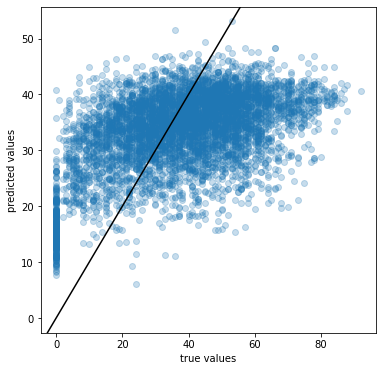

In [24]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

In [25]:
model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

Epoch 1/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 290.9112 - mean_absolute_error: 13.8966 - r2_score: 0.1896 - root_mean_squared_error: 17.0548
Epoch 2/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - loss: 289.7758 - mean_absolute_error: 13.8068 - r2_score: 0.1954 - root_mean_squared_error: 17.0226
Epoch 3/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - loss: 286.9595 - mean_absolute_error: 13.7240 - r2_score: 0.1975 - root_mean_squared_error: 16.9394
Epoch 4/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - loss: 285.2805 - mean_absolute_error: 13.7193 - r2_score: 0.2059 - root_mean_squared_error: 16.8900
Epoch 5/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - loss: 282.7196 - mean_absolute_error: 13.6508 - r2_score: 0.2239 - root_mean_squared_error: 16.8124
Epoch 6/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - loss: 281.3275 - mean_absolute_error: 13.5700 - r2_score: 0.2149 - root_mean_squared_error: 16.7720
Epoch 7/20
266/266 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - loss: 27

[225.51097106933594,
 15.017023086547852,
 0.36548328399658203,
 11.930246353149414]

177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
RMSE: 225.51106130898864
R^2: 0.36548311685725365
bias: 11.93024707632016
RPIQ: 0.054731479780922236


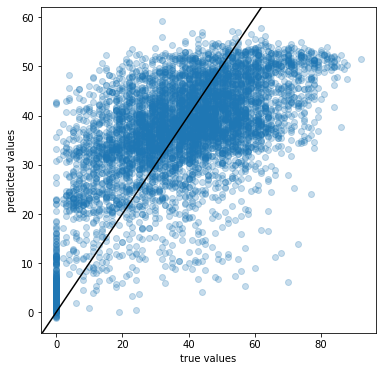

In [26]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# ORGANIC CARBON

## KSSL MIR

In [114]:
columns = []
columns.append('oc_usda.c729_w.pct')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,oc_usda.c729_w.pct,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,2.9100,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,1.8900,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,1.0000,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,0.4800,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,0.1208,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,0.5084,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,0.3148,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,0.6312,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,0.2508,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [115]:
X = pd.DataFrame(data=data[mir_columns], columns=mir_columns)
y = data['oc_usda.c729_w.pct']
feature_columns = X.shape[1]

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [117]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.InputLayer(shape=(feature_columns, 1)),
    
    tf.keras.layers.Conv1D(filters=32, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    
    tf.keras.layers.Conv1D(filters=64, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=128, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=256, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=100, activation='relu'),
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(units=1, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score(), tf.keras.metrics.MeanAbsoluteError()])

In [118]:
model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

Epoch 1/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 102s 151ms/step - loss: 39.1725 - mean_absolute_error: 2.9336 - r2_score: 0.5980 - root_mean_squared_error: 6.0531
Epoch 2/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 100s 153ms/step - loss: 8.8165 - mean_absolute_error: 1.3197 - r2_score: 0.9090 - root_mean_squared_error: 2.9623
Epoch 3/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 101s 154ms/step - loss: 6.4874 - mean_absolute_error: 1.0880 - r2_score: 0.9354 - root_mean_squared_error: 2.5441
Epoch 4/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 101s 154ms/step - loss: 5.5271 - mean_absolute_error: 0.9897 - r2_score: 0.9449 - root_mean_squared_error: 2.3464
Epoch 5/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 101s 154ms/step - loss: 5.4153 - mean_absolute_error: 0.9617 - r2_score: 0.9457 - root_mean_squared_error: 2.3203
Epoch 6/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 104s 158ms/step - loss: 4.2564 - mean_absolute_error: 0.8775 - r2_score: 0.9567 - root_mean_squared_error: 2.0621
Epoch 7/20
655/655 ━━━━━━━━━━━━━━━━━━━━ 101s 154ms/step - loss: 4.3376 - me

[1.4823580980300903, 1.2175213098526, 0.9844040274620056, 0.635367214679718]

437/437 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step
RMSE: 1.4823584464969704
R^2: 0.9844040089812985
bias: 0.6353676516412425
RPIQ: 1.5416980729818957


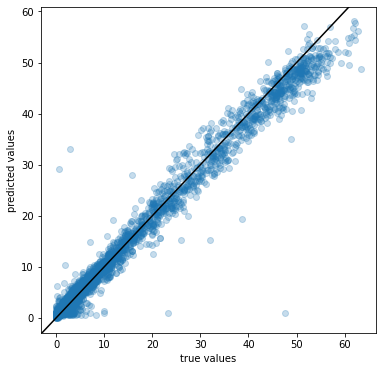

In [119]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## LUCAS VisNIR

In [120]:
columns = []
columns.append('oc_iso.10694_w.pct')
for column in visnir_columns[25:]:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'LUCAS.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,oc_iso.10694_w.pct,scan_visnir.400_ref,scan_visnir.402_ref,scan_visnir.404_ref,scan_visnir.406_ref,scan_visnir.408_ref,scan_visnir.410_ref,scan_visnir.412_ref,scan_visnir.414_ref,scan_visnir.416_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
95476,9.11,0.147331,0.137725,0.129233,0.122038,0.116199,0.111652,0.108249,0.105793,0.104077,...,0.281269,0.281066,0.280881,0.280715,0.280566,0.280457,0.280389,0.280337,0.280321,0.280355
95477,2.14,0.196777,0.181492,0.168124,0.156923,0.147937,0.141014,0.135856,0.132139,0.129554,...,0.380431,0.379638,0.378879,0.378168,0.377544,0.377009,0.376543,0.376147,0.375830,0.375504
95478,1.56,0.215656,0.196448,0.179823,0.165995,0.154917,0.146328,0.139857,0.135119,0.131746,...,0.379886,0.378946,0.378047,0.377186,0.376361,0.375612,0.374935,0.374315,0.373759,0.373110
95479,1.98,0.200385,0.185616,0.172716,0.161951,0.153353,0.146730,0.141793,0.138226,0.135729,...,0.260330,0.259418,0.258505,0.257603,0.256744,0.255934,0.255173,0.254467,0.253815,0.253045
95480,3.35,0.211138,0.193811,0.178648,0.165877,0.155546,0.147513,0.141501,0.137160,0.134128,...,0.401367,0.400499,0.399693,0.398964,0.398307,0.397749,0.397298,0.396927,0.396609,0.396239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135646,0.84,0.134596,0.123176,0.113366,0.105305,0.098835,0.093753,0.089851,0.086902,0.084672,...,0.238452,0.237691,0.236922,0.236146,0.235420,0.234750,0.234165,0.233656,0.233179,0.232499
135647,1.08,0.146498,0.133158,0.121717,0.112330,0.104832,0.098949,0.094392,0.090915,0.088276,...,0.286538,0.285587,0.284676,0.283814,0.282987,0.282239,0.281584,0.280977,0.280416,0.279644
135648,0.67,0.141685,0.130641,0.121164,0.113433,0.107294,0.102510,0.098863,0.096139,0.094123,...,0.234215,0.233401,0.232597,0.231818,0.231075,0.230400,0.229796,0.229211,0.228687,0.228053
135649,0.57,0.142072,0.131503,0.122369,0.114908,0.109030,0.104478,0.101000,0.098400,0.096492,...,0.289042,0.288496,0.287980,0.287488,0.287001,0.286541,0.286125,0.285737,0.285374,0.284905


In [121]:
X = pd.DataFrame(data=data[visnir_columns[25:]], columns=visnir_columns[25:])
y = data['oc_iso.10694_w.pct']
feature_columns = X.shape[1]

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [123]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.InputLayer(shape=(feature_columns, 1)),
    
    tf.keras.layers.Conv1D(filters=32, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    
    tf.keras.layers.Conv1D(filters=64, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=128, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=256, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=100, activation='relu'),
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(units=1, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score(), tf.keras.metrics.MeanAbsoluteError()])

In [124]:
model.fit(X_train, y_train, epochs=20, batch_size=64) #trenirano 2 puta
model.evaluate(X_test, y_test)

Epoch 1/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - loss: 54.3979 - mean_absolute_error: 3.5793 - r2_score: 0.1719 - root_mean_squared_error: 7.3400
Epoch 2/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: 27.7016 - mean_absolute_error: 2.6905 - r2_score: 0.6050 - root_mean_squared_error: 5.2617
Epoch 3/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 21.0066 - mean_absolute_error: 2.3962 - r2_score: 0.6940 - root_mean_squared_error: 4.5822
Epoch 4/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 17.7100 - mean_absolute_error: 2.2321 - r2_score: 0.7315 - root_mean_squared_error: 4.2057
Epoch 5/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - loss: 17.5109 - mean_absolute_error: 2.1919 - r2_score: 0.7580 - root_mean_squared_error: 4.1833
Epoch 6/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 16.5510 - mean_absolute_error: 2.1489 - r2_score: 0.7621 - root_mean_squared_error: 4.0679
Epoch 7/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 15.5681 - mean_absol

[12.692285537719727, 3.5626235008239746, 0.8218024969100952, 1.844156265258789]

314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
RMSE: 12.692284200468498
R^2: 0.8218024438381263
bias: 1.844156043234217
RPIQ: 0.13225407930030283


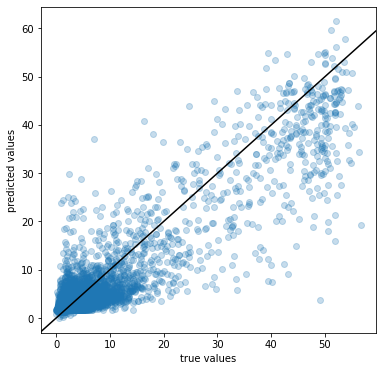

In [125]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# TOTAL CARBON

## KSSL MIR

In [126]:
columns = []
columns.append('c.tot_usda.a622_w.pct')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,c.tot_usda.a622_w.pct,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,2.91440,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,1.89126,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,1.00051,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,0.48350,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,0.25695,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,0.71266,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,0.55271,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,0.68971,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,1.55503,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [127]:
X = pd.DataFrame(data=data[mir_columns], columns=mir_columns)
y = data['c.tot_usda.a622_w.pct']
feature_columns = X.shape[1]

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [129]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.InputLayer(shape=(feature_columns, 1)),
    
    tf.keras.layers.Conv1D(filters=32, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    
    tf.keras.layers.Conv1D(filters=64, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=128, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=256, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=100, activation='relu'),
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(units=1, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score(), tf.keras.metrics.MeanAbsoluteError()])

In [130]:
model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

Epoch 1/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 137s 152ms/step - loss: 53.8612 - mean_absolute_error: 3.8592 - r2_score: 0.7064 - root_mean_squared_error: 6.9882
Epoch 2/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 138s 154ms/step - loss: 11.4290 - mean_absolute_error: 1.6658 - r2_score: 0.9383 - root_mean_squared_error: 3.3772
Epoch 3/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 139s 154ms/step - loss: 8.9426 - mean_absolute_error: 1.4173 - r2_score: 0.9511 - root_mean_squared_error: 2.9896
Epoch 4/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 139s 154ms/step - loss: 7.9950 - mean_absolute_error: 1.3004 - r2_score: 0.9566 - root_mean_squared_error: 2.8237
Epoch 5/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 138s 154ms/step - loss: 7.0410 - mean_absolute_error: 1.2248 - r2_score: 0.9619 - root_mean_squared_error: 2.6520
Epoch 6/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 139s 155ms/step - loss: 6.3892 - mean_absolute_error: 1.1492 - r2_score: 0.9651 - root_mean_squared_error: 2.5270
Epoch 7/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 139s 154ms/step - loss: 6.2149 - m

[2.2286317348480225, 1.492860198020935, 0.9878579378128052, 0.6684181690216064]

599/599 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step
RMSE: 2.228631606052422
R^2: 0.9878579274402416
bias: 0.6684183804428345
RPIQ: 1.5762773844505822


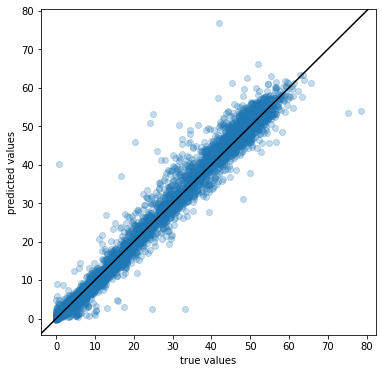

In [131]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## KSSL VisNIR

In [135]:
columns = []
columns.append('c.tot_usda.a622_w.pct')
for column in visnir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,c.tot_usda.a622_w.pct,scan_visnir.350_ref,scan_visnir.352_ref,scan_visnir.354_ref,scan_visnir.356_ref,scan_visnir.358_ref,scan_visnir.360_ref,scan_visnir.362_ref,scan_visnir.364_ref,scan_visnir.366_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
18152,1.87709,0.077421,0.072910,0.073691,0.072176,0.074600,0.072097,0.073046,0.074168,0.072839,...,0.365855,0.365018,0.364296,0.363637,0.363152,0.362660,0.362011,0.361533,0.361310,0.361050
18153,2.03902,0.066058,0.062893,0.064084,0.061675,0.063588,0.062408,0.064102,0.062895,0.062829,...,0.242379,0.242028,0.241381,0.240597,0.240109,0.239873,0.239396,0.238724,0.238408,0.237969
18154,2.98289,0.077325,0.075455,0.076815,0.074597,0.073646,0.074608,0.073519,0.073493,0.073147,...,0.319659,0.318645,0.317855,0.317300,0.316689,0.316115,0.315196,0.314604,0.314429,0.313930
18155,3.27698,0.097102,0.091112,0.091832,0.093932,0.092380,0.090129,0.092447,0.092410,0.090647,...,0.385901,0.385142,0.384454,0.383486,0.382602,0.381834,0.381084,0.380598,0.380165,0.379788
18156,3.36873,0.119604,0.116179,0.112785,0.113860,0.113838,0.110856,0.112768,0.113648,0.112623,...,0.460175,0.458923,0.457928,0.457054,0.456041,0.455239,0.454524,0.453849,0.453163,0.452622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95471,0.99338,0.109567,0.113936,0.108543,0.108809,0.109337,0.092460,0.103661,0.096557,0.103735,...,0.489457,0.488424,0.487792,0.486853,0.485865,0.485218,0.484344,0.483869,0.484000,0.483605
95472,2.10827,0.106995,0.085072,0.085937,0.089104,0.085709,0.089627,0.082092,0.082001,0.088625,...,0.430683,0.429715,0.428952,0.428255,0.427420,0.426812,0.426288,0.425851,0.425760,0.425386
95473,0.99398,0.100045,0.090723,0.094300,0.096284,0.084119,0.091379,0.085682,0.086158,0.094520,...,0.456814,0.455788,0.455203,0.454340,0.453526,0.452545,0.451923,0.451796,0.451511,0.451213
95474,4.58924,0.069460,0.074518,0.072117,0.062740,0.069880,0.067223,0.064717,0.065808,0.067471,...,0.278715,0.278108,0.277275,0.276336,0.275976,0.275623,0.274905,0.274243,0.273711,0.273456


In [139]:
X = pd.DataFrame(data=data[visnir_columns], columns=visnir_columns)
y = data['c.tot_usda.a622_w.pct']
feature_columns = X.shape[1]

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [140]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.InputLayer(shape=(feature_columns, 1)),
    
    tf.keras.layers.Conv1D(filters=32, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    
    tf.keras.layers.Conv1D(filters=64, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=128, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=256, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=100, activation='relu'),
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(units=1, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score(), tf.keras.metrics.MeanAbsoluteError()])

In [141]:
model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

Epoch 1/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - loss: 322.5213 - mean_absolute_error: 13.3928 - r2_score: -0.0661 - root_mean_squared_error: 17.9354
Epoch 2/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 84.3800 - mean_absolute_error: 5.7025 - r2_score: 0.7237 - root_mean_squared_error: 9.1754
Epoch 3/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 58.8787 - mean_absolute_error: 4.6190 - r2_score: 0.8099 - root_mean_squared_error: 7.6703
Epoch 4/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 52.2798 - mean_absolute_error: 4.3345 - r2_score: 0.8336 - root_mean_squared_error: 7.2290
Epoch 5/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 44.7389 - mean_absolute_error: 3.9741 - r2_score: 0.8555 - root_mean_squared_error: 6.6870
Epoch 6/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 40.0436 - mean_absolute_error: 3.6933 - r2_score: 0.8689 - root_mean_squared_error: 6.3267
Epoch 7/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 35.7604 - mean_a

[25.257305145263672, 5.025664806365967, 0.9202086925506592, 2.7912940979003906]

155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
RMSE: 25.25729635045042
R^2: 0.9202087417729955
bias: 2.7912947359676408
RPIQ: 0.7249365967969857


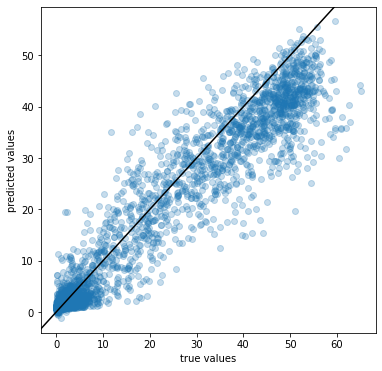

In [142]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# CALCIUM CARBONATE

## KSSL MIR

In [143]:
columns = []
columns.append('caco3_usda.a54_w.pct')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,caco3_usda.a54_w.pct,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7892,1.15654,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
7893,7.79477,1.63972,1.64560,1.65168,1.65828,1.67122,1.67840,1.68572,1.69088,1.69547,...,0.21335,0.21278,0.21240,0.21192,0.21130,0.21072,0.21018,0.20965,0.20912,0.20855
7894,14.59579,1.55310,1.55728,1.56250,1.56868,1.58017,1.58632,1.59285,1.59746,1.60127,...,0.14095,0.14043,0.14005,0.13960,0.13908,0.13848,0.13800,0.13750,0.13705,0.13650
7901,4.91013,1.54258,1.55012,1.55903,1.56913,1.58892,1.59994,1.61226,1.62191,1.62944,...,0.18000,0.17968,0.17945,0.17920,0.17892,0.17860,0.17830,0.17802,0.17768,0.17730
7902,5.27398,1.53715,1.53960,1.54590,1.55645,1.58089,1.59646,1.61428,1.62955,1.64274,...,0.16978,0.16958,0.16947,0.16935,0.16925,0.16908,0.16890,0.16873,0.16855,0.16835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,1.67679,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,1.96300,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,0.49272,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,10.91097,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [144]:
X = pd.DataFrame(data=data[mir_columns], columns=mir_columns)
y = data['caco3_usda.a54_w.pct']
feature_columns = X.shape[1]

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [146]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.InputLayer(shape=(feature_columns, 1)),
    
    tf.keras.layers.Conv1D(filters=32, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    
    tf.keras.layers.Conv1D(filters=64, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=128, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=256, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=100, activation='relu'),
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(units=1, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score(), tf.keras.metrics.MeanAbsoluteError()])

In [147]:
model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

Epoch 1/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 49s 146ms/step - loss: 81.3787 - mean_absolute_error: 4.9747 - r2_score: 0.5104 - root_mean_squared_error: 8.7243
Epoch 2/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 50s 154ms/step - loss: 13.0056 - mean_absolute_error: 1.8711 - r2_score: 0.9284 - root_mean_squared_error: 3.5897
Epoch 3/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 50s 154ms/step - loss: 11.2963 - mean_absolute_error: 1.6446 - r2_score: 0.9367 - root_mean_squared_error: 3.3531
Epoch 4/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 49s 153ms/step - loss: 11.0170 - mean_absolute_error: 1.6495 - r2_score: 0.9399 - root_mean_squared_error: 3.3125
Epoch 5/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 50s 155ms/step - loss: 12.5899 - mean_absolute_error: 1.7227 - r2_score: 0.9318 - root_mean_squared_error: 3.5408
Epoch 6/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 50s 154ms/step - loss: 8.7444 - mean_absolute_error: 1.4395 - r2_score: 0.9507 - root_mean_squared_error: 2.9539
Epoch 7/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 50s 157ms/step - loss: 9.8443 - mean_

[4.800418853759766, 2.190985918045044, 0.9711447954177856, 1.1489951610565186]

215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step
RMSE: 4.80042067543045
R^2: 0.9711448022461249
bias: 1.1489951846008477
RPIQ: 2.5847222611803615


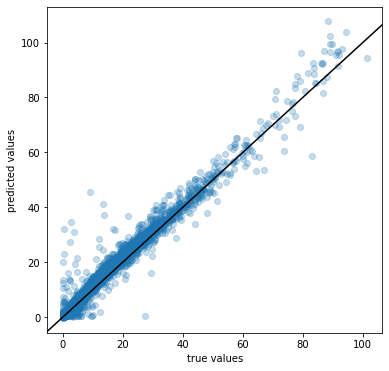

In [148]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## KSSL VisNIR

In [35]:
columns = []
columns.append('caco3_usda.a54_w.pct')
for column in visnir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,caco3_usda.a54_w.pct,scan_visnir.350_ref,scan_visnir.352_ref,scan_visnir.354_ref,scan_visnir.356_ref,scan_visnir.358_ref,scan_visnir.360_ref,scan_visnir.362_ref,scan_visnir.364_ref,scan_visnir.366_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
18154,11.70912,0.077325,0.075455,0.076815,0.074597,0.073646,0.074608,0.073519,0.073493,0.073147,...,0.319659,0.318645,0.317855,0.317300,0.316689,0.316115,0.315196,0.314604,0.314429,0.313930
18155,19.17386,0.097102,0.091112,0.091832,0.093932,0.092380,0.090129,0.092447,0.092410,0.090647,...,0.385901,0.385142,0.384454,0.383486,0.382602,0.381834,0.381084,0.380598,0.380165,0.379788
18156,24.71582,0.119604,0.116179,0.112785,0.113860,0.113838,0.110856,0.112768,0.113648,0.112623,...,0.460175,0.458923,0.457928,0.457054,0.456041,0.455239,0.454524,0.453849,0.453163,0.452622
18157,23.41195,0.114614,0.107037,0.108397,0.104465,0.106687,0.103698,0.106330,0.106408,0.104295,...,0.459933,0.458683,0.457679,0.456765,0.455724,0.454718,0.454004,0.453157,0.452541,0.451932
18158,22.90334,0.116095,0.108076,0.111325,0.108251,0.112229,0.108385,0.107814,0.109524,0.109611,...,0.464363,0.463432,0.462363,0.461403,0.460050,0.459393,0.458799,0.457731,0.457544,0.457192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95465,0.08360,0.099467,0.093240,0.108038,0.098440,0.088737,0.098356,0.098217,0.088650,0.093477,...,0.258237,0.258090,0.257298,0.255707,0.254340,0.253708,0.253343,0.252054,0.251013,0.250153
95466,0.08664,0.153284,0.148737,0.145614,0.139687,0.138406,0.140155,0.142946,0.131388,0.131516,...,0.407116,0.405612,0.404413,0.403627,0.402223,0.401902,0.401593,0.400400,0.399327,0.398628
95467,0.08191,0.147627,0.135499,0.135141,0.135262,0.127226,0.131343,0.129070,0.121714,0.120202,...,0.429762,0.428401,0.427610,0.426567,0.425907,0.425319,0.424506,0.423588,0.422193,0.421651
95474,0.24428,0.069460,0.074518,0.072117,0.062740,0.069880,0.067223,0.064717,0.065808,0.067471,...,0.278715,0.278108,0.277275,0.276336,0.275976,0.275623,0.274905,0.274243,0.273711,0.273456


In [36]:
X = pd.DataFrame(data=data[visnir_columns], columns=visnir_columns)
y = data['caco3_usda.a54_w.pct']
feature_columns = X.shape[1]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [38]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.InputLayer(shape=(feature_columns, 1)),
    
    tf.keras.layers.Conv1D(filters=32, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    
    tf.keras.layers.Conv1D(filters=64, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=128, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=256, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=100, activation='relu'),
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(units=1, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score(), tf.keras.metrics.MeanAbsoluteError()])

In [39]:
model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 104.5197 - mean_absolute_error: 5.9651 - r2_score: -0.0230 - root_mean_squared_error: 10.2189
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 104.9856 - mean_absolute_error: 6.0394 - r2_score: 4.4595e-04 - root_mean_squared_error: 10.2312
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 97.7517 - mean_absolute_error: 5.8900 - r2_score: 0.0081 - root_mean_squared_error: 9.8852
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 94.0890 - mean_absolute_error: 5.7996 - r2_score: 0.0064 - root_mean_squared_error: 9.6932
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 98.1551 - mean_absolute_error: 6.1107 - r2_score: 0.0244 - root_mean_squared_error: 9.8958
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 100.7516 - mean_absolute_error: 6.1882 - r2_score: 0.0129 - root_mean_squared_error: 10.0217
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 97.3218 - mean_a

[98.28004455566406, 9.913629531860352, 0.18349850177764893, 5.095693588256836]

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
RMSE: 98.28006813045083
R^2: 0.1834982010989924
bias: 5.095693774196142
RPIQ: 0.007551567269345532


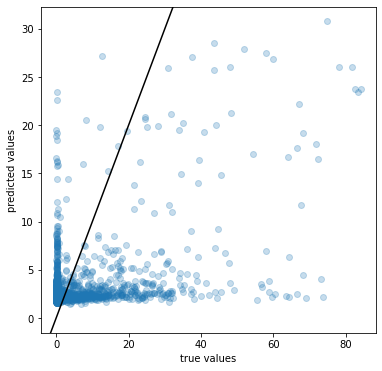

In [40]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

In [41]:
model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 85.3075 - mean_absolute_error: 5.4085 - r2_score: 0.1682 - root_mean_squared_error: 9.2287
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 81.3568 - mean_absolute_error: 5.2918 - r2_score: 0.1679 - root_mean_squared_error: 9.0175
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 86.2727 - mean_absolute_error: 5.2448 - r2_score: 0.1983 - root_mean_squared_error: 9.2825
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 74.6906 - mean_absolute_error: 5.0974 - r2_score: 0.1530 - root_mean_squared_error: 8.6306
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 76.2797 - mean_absolute_error: 5.0458 - r2_score: 0.2414 - root_mean_squared_error: 8.7316
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 78.7859 - mean_absolute_error: 5.2358 - r2_score: 0.2187 - root_mean_squared_error: 8.8587
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 75.0864 - mean_absolute_err

[89.93085479736328, 9.483187675476074, 0.252862811088562, 5.006815433502197]

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
RMSE: 89.93084373090421
R^2: 0.2528627922245228
bias: 5.006816416434306
RPIQ: 0.021171438796492383


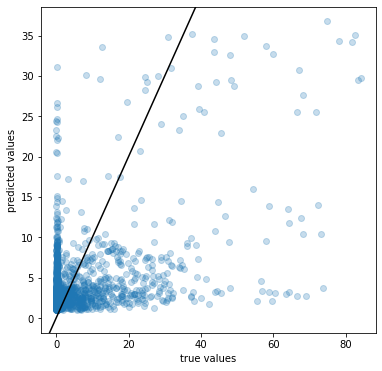

In [42]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## LUCAS VisNIR

In [159]:
columns = []
columns.append('caco3_iso.10693_w.pct')
for column in visnir_columns[25:]:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'LUCAS.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,caco3_iso.10693_w.pct,scan_visnir.400_ref,scan_visnir.402_ref,scan_visnir.404_ref,scan_visnir.406_ref,scan_visnir.408_ref,scan_visnir.410_ref,scan_visnir.412_ref,scan_visnir.414_ref,scan_visnir.416_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
95476,0.2,0.147331,0.137725,0.129233,0.122038,0.116199,0.111652,0.108249,0.105793,0.104077,...,0.281269,0.281066,0.280881,0.280715,0.280566,0.280457,0.280389,0.280337,0.280321,0.280355
95477,0.1,0.196777,0.181492,0.168124,0.156923,0.147937,0.141014,0.135856,0.132139,0.129554,...,0.380431,0.379638,0.378879,0.378168,0.377544,0.377009,0.376543,0.376147,0.375830,0.375504
95478,0.1,0.215656,0.196448,0.179823,0.165995,0.154917,0.146328,0.139857,0.135119,0.131746,...,0.379886,0.378946,0.378047,0.377186,0.376361,0.375612,0.374935,0.374315,0.373759,0.373110
95479,0.1,0.200385,0.185616,0.172716,0.161951,0.153353,0.146730,0.141793,0.138226,0.135729,...,0.260330,0.259418,0.258505,0.257603,0.256744,0.255934,0.255173,0.254467,0.253815,0.253045
95480,0.1,0.211138,0.193811,0.178648,0.165877,0.155546,0.147513,0.141501,0.137160,0.134128,...,0.401367,0.400499,0.399693,0.398964,0.398307,0.397749,0.397298,0.396927,0.396609,0.396239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135646,0.1,0.134596,0.123176,0.113366,0.105305,0.098835,0.093753,0.089851,0.086902,0.084672,...,0.238452,0.237691,0.236922,0.236146,0.235420,0.234750,0.234165,0.233656,0.233179,0.232499
135647,0.2,0.146498,0.133158,0.121717,0.112330,0.104832,0.098949,0.094392,0.090915,0.088276,...,0.286538,0.285587,0.284676,0.283814,0.282987,0.282239,0.281584,0.280977,0.280416,0.279644
135648,0.8,0.141685,0.130641,0.121164,0.113433,0.107294,0.102510,0.098863,0.096139,0.094123,...,0.234215,0.233401,0.232597,0.231818,0.231075,0.230400,0.229796,0.229211,0.228687,0.228053
135649,0.3,0.142072,0.131503,0.122369,0.114908,0.109030,0.104478,0.101000,0.098400,0.096492,...,0.289042,0.288496,0.287980,0.287488,0.287001,0.286541,0.286125,0.285737,0.285374,0.284905


In [160]:
X = pd.DataFrame(data=data[visnir_columns[25:]], columns=visnir_columns[25:])
y = data['caco3_iso.10693_w.pct']
feature_columns = X.shape[1]

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [162]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.InputLayer(shape=(feature_columns, 1)),
    
    tf.keras.layers.Conv1D(filters=32, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    
    tf.keras.layers.Conv1D(filters=64, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=128, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=256, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=100, activation='relu'),
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(units=1, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score(), tf.keras.metrics.MeanAbsoluteError()])

In [163]:
model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

Epoch 1/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - loss: 162.6134 - mean_absolute_error: 7.8262 - r2_score: 0.0783 - root_mean_squared_error: 12.7413
Epoch 2/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: 137.7356 - mean_absolute_error: 7.0810 - r2_score: 0.2255 - root_mean_squared_error: 11.7338
Epoch 3/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - loss: 122.7473 - mean_absolute_error: 6.5829 - r2_score: 0.2901 - root_mean_squared_error: 11.0780
Epoch 4/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 109.2210 - mean_absolute_error: 6.0307 - r2_score: 0.3420 - root_mean_squared_error: 10.4493
Epoch 5/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 110.5293 - mean_absolute_error: 6.0335 - r2_score: 0.3640 - root_mean_squared_error: 10.5096
Epoch 6/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 106.0774 - mean_absolute_error: 5.8237 - r2_score: 0.3817 - root_mean_squared_error: 10.2973
Epoch 7/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 102.4727

[65.76182556152344, 8.109366416931152, 0.6119285821914673, 4.4098029136657715]

314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
RMSE: 65.76184926899985
R^2: 0.6119284608823794
bias: 4.409804309709038
RPIQ: 0.040504623522018224


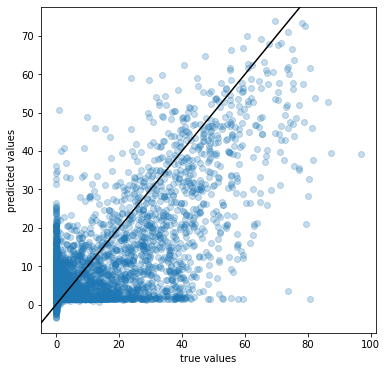

In [164]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

In [165]:
model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

Epoch 1/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - loss: 71.4646 - mean_absolute_error: 4.6365 - r2_score: 0.5952 - root_mean_squared_error: 8.4529
Epoch 2/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 73.5612 - mean_absolute_error: 4.7082 - r2_score: 0.5741 - root_mean_squared_error: 8.5745
Epoch 3/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - loss: 71.2043 - mean_absolute_error: 4.6379 - r2_score: 0.6033 - root_mean_squared_error: 8.4369
Epoch 4/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 69.9092 - mean_absolute_error: 4.5442 - r2_score: 0.6030 - root_mean_squared_error: 8.3564
Epoch 5/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 69.9330 - mean_absolute_error: 4.5547 - r2_score: 0.5864 - root_mean_squared_error: 8.3612
Epoch 6/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 68.6159 - mean_absolute_error: 4.5110 - r2_score: 0.5975 - root_mean_squared_error: 8.2805
Epoch 7/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 69.7585 - mean_absol

[54.625797271728516, 7.390926837921143, 0.6776441335678101, 3.841970682144165]

314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
RMSE: 54.625807021950905
R^2: 0.677644086317632
bias: 3.841970419696796
RPIQ: 0.05307541928087315


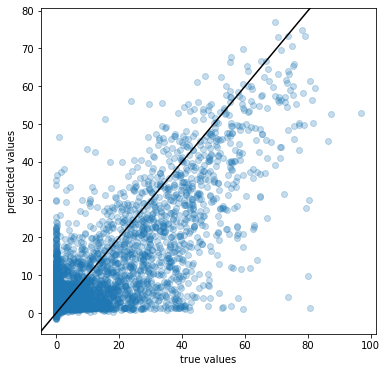

In [166]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# pH

## KSSL MIR

In [167]:
columns = []
columns.append('ph.h2o_usda.a268_index')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,ph.h2o_usda.a268_index,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,5.67,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,5.86,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,6.48,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,7.54,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,8.27,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,8.11,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,8.17,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,8.13,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,8.44,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [168]:
X = pd.DataFrame(data=data[mir_columns], columns=mir_columns)
y = data['ph.h2o_usda.a268_index']
feature_columns = X.shape[1]

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [170]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.InputLayer(shape=(feature_columns, 1)),
    
    tf.keras.layers.Conv1D(filters=32, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    
    tf.keras.layers.Conv1D(filters=64, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=128, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=256, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=100, activation='relu'),
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(units=1, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score(), tf.keras.metrics.MeanAbsoluteError()])

In [171]:
model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

Epoch 1/20
620/620 ━━━━━━━━━━━━━━━━━━━━ 95s 151ms/step - loss: 3.1876 - mean_absolute_error: 1.3206 - r2_score: -0.8290 - root_mean_squared_error: 1.7068
Epoch 2/20
620/620 ━━━━━━━━━━━━━━━━━━━━ 97s 156ms/step - loss: 0.9539 - mean_absolute_error: 0.7683 - r2_score: 0.4541 - root_mean_squared_error: 0.9765
Epoch 3/20
620/620 ━━━━━━━━━━━━━━━━━━━━ 96s 155ms/step - loss: 0.7767 - mean_absolute_error: 0.6893 - r2_score: 0.5518 - root_mean_squared_error: 0.8812
Epoch 4/20
620/620 ━━━━━━━━━━━━━━━━━━━━ 97s 157ms/step - loss: 0.7409 - mean_absolute_error: 0.6690 - r2_score: 0.5720 - root_mean_squared_error: 0.8606
Epoch 5/20
620/620 ━━━━━━━━━━━━━━━━━━━━ 97s 157ms/step - loss: 0.6578 - mean_absolute_error: 0.6271 - r2_score: 0.6219 - root_mean_squared_error: 0.8110
Epoch 6/20
620/620 ━━━━━━━━━━━━━━━━━━━━ 96s 155ms/step - loss: 0.5982 - mean_absolute_error: 0.5995 - r2_score: 0.6594 - root_mean_squared_error: 0.7734
Epoch 7/20
620/620 ━━━━━━━━━━━━━━━━━━━━ 96s 155ms/step - loss: 0.5504 - mean_abso

[0.21941065788269043,
 0.4684129059314728,
 0.8755876421928406,
 0.35099220275878906]

414/414 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step
RMSE: 0.21941065228114687
R^2: 0.8755860461723535
bias: 0.35099226105176184
RPIQ: 8.629588115235684


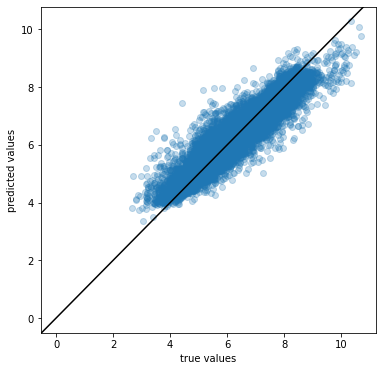

In [172]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## LUCAS VisNIR

In [173]:
columns = []
columns.append('ph.h2o_iso.10390_index')
for column in visnir_columns[25:]:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'LUCAS.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,ph.h2o_iso.10390_index,scan_visnir.400_ref,scan_visnir.402_ref,scan_visnir.404_ref,scan_visnir.406_ref,scan_visnir.408_ref,scan_visnir.410_ref,scan_visnir.412_ref,scan_visnir.414_ref,scan_visnir.416_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
95476,4.00,0.147331,0.137725,0.129233,0.122038,0.116199,0.111652,0.108249,0.105793,0.104077,...,0.281269,0.281066,0.280881,0.280715,0.280566,0.280457,0.280389,0.280337,0.280321,0.280355
95477,6.53,0.196777,0.181492,0.168124,0.156923,0.147937,0.141014,0.135856,0.132139,0.129554,...,0.380431,0.379638,0.378879,0.378168,0.377544,0.377009,0.376543,0.376147,0.375830,0.375504
95478,7.14,0.215656,0.196448,0.179823,0.165995,0.154917,0.146328,0.139857,0.135119,0.131746,...,0.379886,0.378946,0.378047,0.377186,0.376361,0.375612,0.374935,0.374315,0.373759,0.373110
95479,4.83,0.200385,0.185616,0.172716,0.161951,0.153353,0.146730,0.141793,0.138226,0.135729,...,0.260330,0.259418,0.258505,0.257603,0.256744,0.255934,0.255173,0.254467,0.253815,0.253045
95480,5.74,0.211138,0.193811,0.178648,0.165877,0.155546,0.147513,0.141501,0.137160,0.134128,...,0.401367,0.400499,0.399693,0.398964,0.398307,0.397749,0.397298,0.396927,0.396609,0.396239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135646,6.97,0.134596,0.123176,0.113366,0.105305,0.098835,0.093753,0.089851,0.086902,0.084672,...,0.238452,0.237691,0.236922,0.236146,0.235420,0.234750,0.234165,0.233656,0.233179,0.232499
135647,7.79,0.146498,0.133158,0.121717,0.112330,0.104832,0.098949,0.094392,0.090915,0.088276,...,0.286538,0.285587,0.284676,0.283814,0.282987,0.282239,0.281584,0.280977,0.280416,0.279644
135648,7.80,0.141685,0.130641,0.121164,0.113433,0.107294,0.102510,0.098863,0.096139,0.094123,...,0.234215,0.233401,0.232597,0.231818,0.231075,0.230400,0.229796,0.229211,0.228687,0.228053
135649,8.05,0.142072,0.131503,0.122369,0.114908,0.109030,0.104478,0.101000,0.098400,0.096492,...,0.289042,0.288496,0.287980,0.287488,0.287001,0.286541,0.286125,0.285737,0.285374,0.284905


In [174]:
X = pd.DataFrame(data=data[visnir_columns[25:]], columns=visnir_columns[25:])
y = data['ph.h2o_iso.10390_index']
feature_columns = X.shape[1]

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [179]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.InputLayer(shape=(feature_columns, 1)),
    
    tf.keras.layers.Conv1D(filters=32, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    
    tf.keras.layers.Conv1D(filters=64, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=128, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=256, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=100, activation='relu'),
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(units=1, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score(), tf.keras.metrics.MeanAbsoluteError()])

In [180]:
model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

Epoch 1/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 26s 43ms/step - loss: 5.0684 - mean_absolute_error: 1.7037 - r2_score: -1.7515 - root_mean_squared_error: 2.1448
Epoch 2/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - loss: 2.1853 - mean_absolute_error: 1.2378 - r2_score: -0.2002 - root_mean_squared_error: 1.4783
Epoch 3/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - loss: 2.0801 - mean_absolute_error: 1.2174 - r2_score: -0.1420 - root_mean_squared_error: 1.4422
Epoch 4/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - loss: 1.7068 - mean_absolute_error: 1.0828 - r2_score: 0.0668 - root_mean_squared_error: 1.3064
Epoch 5/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - loss: 1.5853 - mean_absolute_error: 1.0462 - r2_score: 0.1344 - root_mean_squared_error: 1.2591
Epoch 6/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - loss: 1.4939 - mean_absolute_error: 1.0188 - r2_score: 0.1768 - root_mean_squared_error: 1.2222
Epoch 7/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 1.3469 - mean_absolute_

[0.4851212203502655,
 0.6965064406394958,
 0.7339463233947754,
 0.5534164309501648]

314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
RMSE: 0.4851213634333952
R^2: 0.7339457031052101
bias: 0.553416498391954
RPIQ: 3.747608900267186


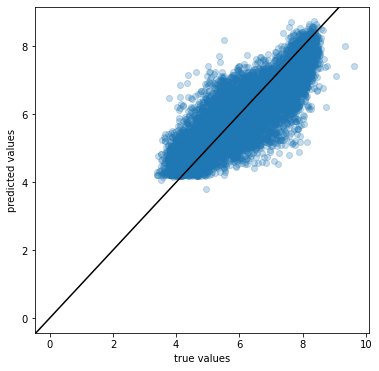

In [181]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# BULK DENSITY

## KSSL MIR

In [182]:
columns = []
columns.append('bd_usda.a4_g.cm3')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,bd_usda.a4_g.cm3,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,1.10815,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,1.31134,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,1.37769,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,1.49334,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,1.55718,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,1.36866,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,1.22590,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,1.27768,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,1.32984,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [183]:
X = pd.DataFrame(data=data[mir_columns], columns=mir_columns)
y = data['bd_usda.a4_g.cm3']
feature_columns = X.shape[1]

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [185]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.InputLayer(shape=(feature_columns, 1)),
    
    tf.keras.layers.Conv1D(filters=32, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    
    tf.keras.layers.Conv1D(filters=64, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=128, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=256, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=100, activation='relu'),
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(units=1, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score(), tf.keras.metrics.MeanAbsoluteError()])

In [186]:
model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

Epoch 1/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 60s 151ms/step - loss: 0.3342 - mean_absolute_error: 0.4166 - r2_score: -0.9777 - root_mean_squared_error: 0.5479
Epoch 2/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 61s 156ms/step - loss: 0.0755 - mean_absolute_error: 0.2218 - r2_score: 0.5574 - root_mean_squared_error: 0.2748
Epoch 3/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 61s 156ms/step - loss: 0.0663 - mean_absolute_error: 0.2061 - r2_score: 0.6144 - root_mean_squared_error: 0.2574
Epoch 4/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 61s 157ms/step - loss: 0.0637 - mean_absolute_error: 0.2007 - r2_score: 0.6192 - root_mean_squared_error: 0.2524
Epoch 5/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 62s 160ms/step - loss: 0.0640 - mean_absolute_error: 0.2017 - r2_score: 0.6229 - root_mean_squared_error: 0.2529
Epoch 6/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 61s 157ms/step - loss: 0.0606 - mean_absolute_error: 0.1953 - r2_score: 0.6405 - root_mean_squared_error: 0.2461
Epoch 7/20
389/389 ━━━━━━━━━━━━━━━━━━━━ 61s 156ms/step - loss: 0.0594 - mean_abso

[0.047922778874635696,
 0.21891272068023682,
 0.7176142930984497,
 0.16953729093074799]

259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step
RMSE: 0.04792277572725427
R^2: 0.7176137397969335
bias: 0.169537269296896
RPIQ: 11.910801111199598


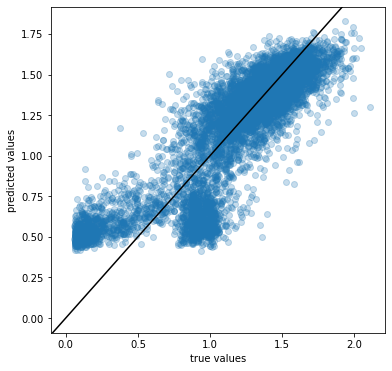

In [187]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## KSSL VisNIR

In [188]:
columns = []
columns.append('bd_usda.a4_g.cm3')
for column in visnir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,bd_usda.a4_g.cm3,scan_visnir.350_ref,scan_visnir.352_ref,scan_visnir.354_ref,scan_visnir.356_ref,scan_visnir.358_ref,scan_visnir.360_ref,scan_visnir.362_ref,scan_visnir.364_ref,scan_visnir.366_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
18152,1.14756,0.077421,0.072910,0.073691,0.072176,0.074600,0.072097,0.073046,0.074168,0.072839,...,0.365855,0.365018,0.364296,0.363637,0.363152,0.362660,0.362011,0.361533,0.361310,0.361050
18153,1.31548,0.066058,0.062893,0.064084,0.061675,0.063588,0.062408,0.064102,0.062895,0.062829,...,0.242379,0.242028,0.241381,0.240597,0.240109,0.239873,0.239396,0.238724,0.238408,0.237969
18154,1.31010,0.077325,0.075455,0.076815,0.074597,0.073646,0.074608,0.073519,0.073493,0.073147,...,0.319659,0.318645,0.317855,0.317300,0.316689,0.316115,0.315196,0.314604,0.314429,0.313930
18155,1.13472,0.097102,0.091112,0.091832,0.093932,0.092380,0.090129,0.092447,0.092410,0.090647,...,0.385901,0.385142,0.384454,0.383486,0.382602,0.381834,0.381084,0.380598,0.380165,0.379788
18156,1.30826,0.119604,0.116179,0.112785,0.113860,0.113838,0.110856,0.112768,0.113648,0.112623,...,0.460175,0.458923,0.457928,0.457054,0.456041,0.455239,0.454524,0.453849,0.453163,0.452622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95471,1.33984,0.109567,0.113936,0.108543,0.108809,0.109337,0.092460,0.103661,0.096557,0.103735,...,0.489457,0.488424,0.487792,0.486853,0.485865,0.485218,0.484344,0.483869,0.484000,0.483605
95472,1.34513,0.106995,0.085072,0.085937,0.089104,0.085709,0.089627,0.082092,0.082001,0.088625,...,0.430683,0.429715,0.428952,0.428255,0.427420,0.426812,0.426288,0.425851,0.425760,0.425386
95473,1.31742,0.100045,0.090723,0.094300,0.096284,0.084119,0.091379,0.085682,0.086158,0.094520,...,0.456814,0.455788,0.455203,0.454340,0.453526,0.452545,0.451923,0.451796,0.451511,0.451213
95474,0.83309,0.069460,0.074518,0.072117,0.062740,0.069880,0.067223,0.064717,0.065808,0.067471,...,0.278715,0.278108,0.277275,0.276336,0.275976,0.275623,0.274905,0.274243,0.273711,0.273456


In [189]:
X = pd.DataFrame(data=data[visnir_columns], columns=visnir_columns)
y = data['bd_usda.a4_g.cm3']
feature_columns = X.shape[1]

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [191]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.InputLayer(shape=(feature_columns, 1)),
    
    tf.keras.layers.Conv1D(filters=32, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    
    tf.keras.layers.Conv1D(filters=64, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=128, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=256, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=100, activation='relu'),
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(units=1, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score(), tf.keras.metrics.MeanAbsoluteError()])

In [192]:
model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

Epoch 1/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - loss: 0.2396 - mean_absolute_error: 0.3781 - r2_score: -0.3455 - root_mean_squared_error: 0.4803
Epoch 2/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.1553 - mean_absolute_error: 0.3076 - r2_score: 0.1041 - root_mean_squared_error: 0.3940
Epoch 3/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - loss: 0.1110 - mean_absolute_error: 0.2658 - r2_score: 0.3660 - root_mean_squared_error: 0.3330
Epoch 4/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0931 - mean_absolute_error: 0.2468 - r2_score: 0.4694 - root_mean_squared_error: 0.3051
Epoch 5/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0870 - mean_absolute_error: 0.2395 - r2_score: 0.4972 - root_mean_squared_error: 0.2950
Epoch 6/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0846 - mean_absolute_error: 0.2365 - r2_score: 0.5143 - root_mean_squared_error: 0.2909
Epoch 7/20
232/232 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - loss: 0.0832 - mean_absolute_er

[0.06871329993009567,
 0.2621322274208069,
 0.6164621114730835,
 0.20923106372356415]

155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
RMSE: 0.06871329588101384
R^2: 0.6164604570471557
bias: 0.20923106091916485
RPIQ: 8.335380873793065


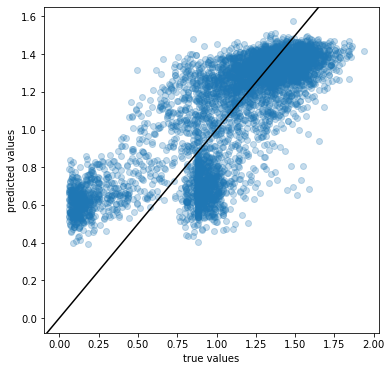

In [193]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# ELECTRICAL CONDUCTIVITY

## KSSL MIR

In [194]:
columns = []
columns.append('ec_usda.a364_ds.m')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,ec_usda.a364_ds.m,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7901,2.20,1.54258,1.55012,1.55903,1.56913,1.58892,1.59994,1.61226,1.62191,1.62944,...,0.18000,0.17968,0.17945,0.17920,0.17892,0.17860,0.17830,0.17802,0.17768,0.17730
7902,3.24,1.53715,1.53960,1.54590,1.55645,1.58089,1.59646,1.61428,1.62955,1.64274,...,0.16978,0.16958,0.16947,0.16935,0.16925,0.16908,0.16890,0.16873,0.16855,0.16835
7903,9.14,1.51638,1.52640,1.53808,1.55170,1.57853,1.59319,1.60908,1.62206,1.63456,...,0.19585,0.19552,0.19532,0.19515,0.19490,0.19467,0.19438,0.19408,0.19375,0.19348
7905,2.64,1.45608,1.46058,1.46790,1.47800,1.49969,1.51299,1.52768,1.53954,1.55004,...,0.21283,0.21258,0.21242,0.21230,0.21205,0.21180,0.21160,0.21133,0.21108,0.21085
7906,3.53,1.50898,1.51235,1.51772,1.52475,1.54024,1.54961,1.55875,1.56521,1.57052,...,0.18675,0.18645,0.18632,0.18612,0.18575,0.18540,0.18505,0.18478,0.18455,0.18428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,0.12,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,0.11,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,0.12,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,0.24,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [195]:
X = pd.DataFrame(data=data[mir_columns], columns=mir_columns)
y = data['ec_usda.a364_ds.m']
feature_columns = X.shape[1]

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [197]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.InputLayer(shape=(feature_columns, 1)),
    
    tf.keras.layers.Conv1D(filters=32, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    
    tf.keras.layers.Conv1D(filters=64, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=128, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=256, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=100, activation='relu'),
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(units=1, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score(), tf.keras.metrics.MeanAbsoluteError()])

In [198]:
model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

Epoch 1/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 57s 148ms/step - loss: 138.9169 - mean_absolute_error: 3.9583 - r2_score: 0.0011 - root_mean_squared_error: 11.7435 
Epoch 2/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 58s 155ms/step - loss: 152.3564 - mean_absolute_error: 3.9691 - r2_score: 0.0451 - root_mean_squared_error: 12.3226
Epoch 3/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 58s 155ms/step - loss: 149.4697 - mean_absolute_error: 4.0468 - r2_score: 0.0838 - root_mean_squared_error: 12.2090
Epoch 4/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 58s 155ms/step - loss: 137.2191 - mean_absolute_error: 3.7258 - r2_score: 0.1398 - root_mean_squared_error: 11.7014
Epoch 5/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 58s 155ms/step - loss: 123.6863 - mean_absolute_error: 3.6904 - r2_score: 0.1801 - root_mean_squared_error: 11.1097
Epoch 6/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 58s 156ms/step - loss: 108.9047 - mean_absolute_error: 3.2794 - r2_score: 0.3395 - root_mean_squared_error: 10.3942
Epoch 7/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 59s 157ms/step - loss: 

[55.14762496948242, 7.426144599914551, 0.6108812093734741, 2.6483278274536133]

250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step
RMSE: 55.14763154785961
R^2: 0.6108812191137405
bias: 2.6483275204754544
RPIQ: 0.00952619079993769


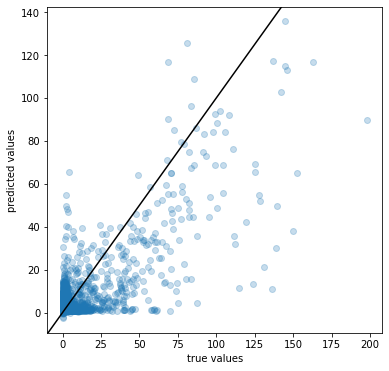

In [199]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## LUCAS VisNIR

In [43]:
columns = []
columns.append('ec_iso.11265_ds.m')
for column in visnir_columns[25:]:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'LUCAS.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,ec_iso.11265_ds.m,scan_visnir.400_ref,scan_visnir.402_ref,scan_visnir.404_ref,scan_visnir.406_ref,scan_visnir.408_ref,scan_visnir.410_ref,scan_visnir.412_ref,scan_visnir.414_ref,scan_visnir.416_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
113869,0.1814,0.173346,0.159692,0.147878,0.138147,0.130453,0.124555,0.120148,0.116944,0.114679,...,0.344580,0.344050,0.343513,0.343058,0.342691,0.342355,0.342048,0.341837,0.341747,0.341728
113870,0.1481,0.251348,0.232561,0.216216,0.202723,0.191893,0.183363,0.176812,0.171901,0.168282,...,0.475101,0.474677,0.474293,0.473987,0.473781,0.473655,0.473584,0.473643,0.473838,0.474198
113871,0.2810,0.161221,0.148654,0.137825,0.128942,0.121964,0.116652,0.112707,0.109858,0.107865,...,0.273004,0.272162,0.271325,0.270574,0.269921,0.269343,0.268824,0.268344,0.267915,0.267430
113872,0.0537,0.186592,0.170279,0.156208,0.144598,0.135380,0.128286,0.122970,0.119066,0.116230,...,0.441528,0.441024,0.440526,0.440109,0.439803,0.439550,0.439345,0.439247,0.439261,0.439353
113873,0.2160,0.173072,0.159340,0.147474,0.137704,0.129969,0.124029,0.119585,0.116345,0.114038,...,0.344269,0.343284,0.342273,0.341352,0.340577,0.339950,0.339486,0.339197,0.339042,0.338915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135646,0.2110,0.134596,0.123176,0.113366,0.105305,0.098835,0.093753,0.089851,0.086902,0.084672,...,0.238452,0.237691,0.236922,0.236146,0.235420,0.234750,0.234165,0.233656,0.233179,0.232499
135647,0.1084,0.146498,0.133158,0.121717,0.112330,0.104832,0.098949,0.094392,0.090915,0.088276,...,0.286538,0.285587,0.284676,0.283814,0.282987,0.282239,0.281584,0.280977,0.280416,0.279644
135648,0.1509,0.141685,0.130641,0.121164,0.113433,0.107294,0.102510,0.098863,0.096139,0.094123,...,0.234215,0.233401,0.232597,0.231818,0.231075,0.230400,0.229796,0.229211,0.228687,0.228053
135649,0.1550,0.142072,0.131503,0.122369,0.114908,0.109030,0.104478,0.101000,0.098400,0.096492,...,0.289042,0.288496,0.287980,0.287488,0.287001,0.286541,0.286125,0.285737,0.285374,0.284905


In [44]:
X = pd.DataFrame(data=data[visnir_columns[25:]], columns=visnir_columns[25:])
y = data['ec_iso.11265_ds.m']
feature_columns = X.shape[1]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [46]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.InputLayer(shape=(feature_columns, 1)),
    
    tf.keras.layers.Conv1D(filters=32, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    
    tf.keras.layers.Conv1D(filters=64, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=128, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=256, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=100, activation='relu'),
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(units=1, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score(), tf.keras.metrics.MeanAbsoluteError()])

In [47]:
model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

Epoch 1/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - loss: 0.1052 - mean_absolute_error: 0.1801 - r2_score: -0.0639 - root_mean_squared_error: 0.3239
Epoch 2/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.1084 - mean_absolute_error: 0.1697 - r2_score: 0.0587 - root_mean_squared_error: 0.3283
Epoch 3/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 0.0970 - mean_absolute_error: 0.1694 - r2_score: 0.0751 - root_mean_squared_error: 0.3108
Epoch 4/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - loss: 0.1099 - mean_absolute_error: 0.1746 - r2_score: 0.0840 - root_mean_squared_error: 0.3306
Epoch 5/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - loss: 0.0959 - mean_absolute_error: 0.1674 - r2_score: 0.0933 - root_mean_squared_error: 0.3089
Epoch 6/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - loss: 0.0995 - mean_absolute_error: 0.1685 - r2_score: 0.0775 - root_mean_squared_error: 0.3153
Epoch 7/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - loss: 0.0876 - mean_absolute_er

[0.09522745013237,
 0.30858945846557617,
 0.22704559564590454,
 0.1595773994922638]

171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
RMSE: 0.09522747169902791
R^2: 0.2270451972207269
bias: 0.1595774167024757
RPIQ: 0.4731292408315373


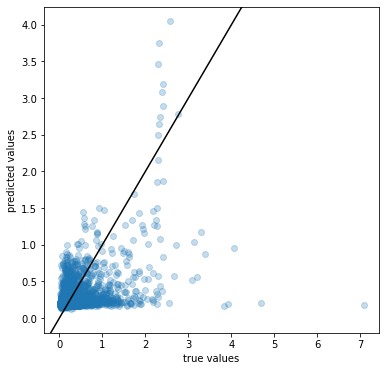

In [48]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

In [49]:
model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

Epoch 1/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - loss: 0.0869 - mean_absolute_error: 0.1583 - r2_score: 0.2155 - root_mean_squared_error: 0.2942
Epoch 2/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 0.0715 - mean_absolute_error: 0.1520 - r2_score: 0.2535 - root_mean_squared_error: 0.2669
Epoch 3/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - loss: 0.0843 - mean_absolute_error: 0.1596 - r2_score: 0.2258 - root_mean_squared_error: 0.2901
Epoch 4/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - loss: 0.0723 - mean_absolute_error: 0.1543 - r2_score: 0.2282 - root_mean_squared_error: 0.2682
Epoch 5/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - loss: 0.0719 - mean_absolute_error: 0.1559 - r2_score: 0.2762 - root_mean_squared_error: 0.2675
Epoch 6/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - loss: 0.0875 - mean_absolute_error: 0.1625 - r2_score: 0.2232 - root_mean_squared_error: 0.2956
Epoch 7/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - loss: 0.0813 - mean_absolute_err

[0.09601092338562012,
 0.3098562955856323,
 0.22068625688552856,
 0.17056691646575928]

171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
RMSE: 0.09601093589482189
R^2: 0.2206858725201979
bias: 0.17056691657879142
RPIQ: 0.9340953115489542


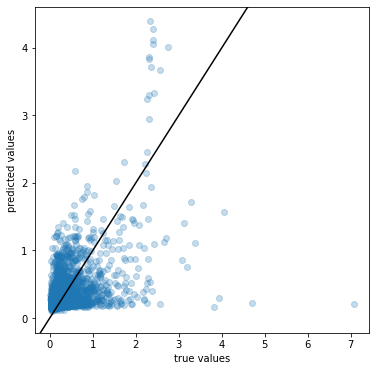

In [50]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# CATION EXCHANGE CAPACITY

## KSSL MIR

In [206]:
columns = []
columns.append('cec_usda.a723_cmolc.kg')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,cec_usda.a723_cmolc.kg,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,21.38778,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,24.12791,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,30.03881,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,28.14704,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,21.75416,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,17.55256,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,15.46190,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,22.76420,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,25.26591,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [207]:
X = pd.DataFrame(data=data[mir_columns], columns=mir_columns)
y = data['cec_usda.a723_cmolc.kg']
feature_columns = X.shape[1]

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [209]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.InputLayer(shape=(feature_columns, 1)),
    
    tf.keras.layers.Conv1D(filters=32, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    
    tf.keras.layers.Conv1D(filters=64, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=128, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=256, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=100, activation='relu'),
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(units=1, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score(), tf.keras.metrics.MeanAbsoluteError()])

In [210]:
model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

Epoch 1/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 97s 153ms/step - loss: 318.2073 - mean_absolute_error: 10.1545 - r2_score: 0.4123 - root_mean_squared_error: 17.5877
Epoch 2/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 99s 158ms/step - loss: 127.6884 - mean_absolute_error: 5.9347 - r2_score: 0.7810 - root_mean_squared_error: 11.2918
Epoch 3/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 97s 156ms/step - loss: 106.1391 - mean_absolute_error: 5.4742 - r2_score: 0.8085 - root_mean_squared_error: 10.2875
Epoch 4/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 97s 156ms/step - loss: 98.8286 - mean_absolute_error: 5.2248 - r2_score: 0.8195 - root_mean_squared_error: 9.9366
Epoch 5/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 98s 157ms/step - loss: 90.4972 - mean_absolute_error: 4.9766 - r2_score: 0.8387 - root_mean_squared_error: 9.4936
Epoch 6/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 98s 156ms/step - loss: 82.4941 - mean_absolute_error: 4.7829 - r2_score: 0.8535 - root_mean_squared_error: 9.0731
Epoch 7/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 98s 158ms/step - loss: 73.840

[41.283203125, 6.425200462341309, 0.9246976375579834, 3.6105399131774902]

416/416 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step
RMSE: 41.28320707569155
R^2: 0.9246976810414456
bias: 3.610539212247985
RPIQ: 0.3515181475084974


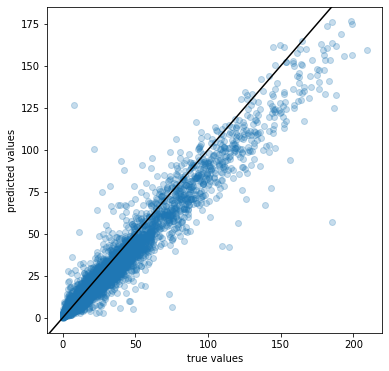

In [211]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## LUCAS VisNIR

In [59]:
columns = []
columns.append('cec_iso.11260_cmolc.kg')
for column in visnir_columns[25:]:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'LUCAS.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,cec_iso.11260_cmolc.kg,scan_visnir.400_ref,scan_visnir.402_ref,scan_visnir.404_ref,scan_visnir.406_ref,scan_visnir.408_ref,scan_visnir.410_ref,scan_visnir.412_ref,scan_visnir.414_ref,scan_visnir.416_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
95476,7.2,0.147331,0.137725,0.129233,0.122038,0.116199,0.111652,0.108249,0.105793,0.104077,...,0.281269,0.281066,0.280881,0.280715,0.280566,0.280457,0.280389,0.280337,0.280321,0.280355
95477,13.0,0.196777,0.181492,0.168124,0.156923,0.147937,0.141014,0.135856,0.132139,0.129554,...,0.380431,0.379638,0.378879,0.378168,0.377544,0.377009,0.376543,0.376147,0.375830,0.375504
95478,24.6,0.215656,0.196448,0.179823,0.165995,0.154917,0.146328,0.139857,0.135119,0.131746,...,0.379886,0.378946,0.378047,0.377186,0.376361,0.375612,0.374935,0.374315,0.373759,0.373110
95479,20.6,0.200385,0.185616,0.172716,0.161951,0.153353,0.146730,0.141793,0.138226,0.135729,...,0.260330,0.259418,0.258505,0.257603,0.256744,0.255934,0.255173,0.254467,0.253815,0.253045
95480,15.0,0.211138,0.193811,0.178648,0.165877,0.155546,0.147513,0.141501,0.137160,0.134128,...,0.401367,0.400499,0.399693,0.398964,0.398307,0.397749,0.397298,0.396927,0.396609,0.396239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113864,9.7,0.245015,0.224416,0.206519,0.191577,0.179569,0.170252,0.163268,0.158218,0.154717,...,0.458799,0.458305,0.457847,0.457396,0.456953,0.456555,0.456244,0.456026,0.455895,0.455810
113865,7.2,0.204041,0.186489,0.171210,0.158381,0.147981,0.139833,0.133658,0.129136,0.125906,...,0.427798,0.427246,0.426737,0.426303,0.425913,0.425548,0.425225,0.424973,0.424812,0.424725
113866,7.7,0.202215,0.186067,0.171907,0.159955,0.150233,0.142605,0.136818,0.132574,0.129538,...,0.398189,0.397701,0.397237,0.396807,0.396417,0.396091,0.395835,0.395633,0.395486,0.395359
113867,12.6,0.213318,0.195800,0.180749,0.168387,0.158611,0.151115,0.145547,0.141550,0.138797,...,0.395874,0.395001,0.394189,0.393430,0.392743,0.392145,0.391597,0.391107,0.390716,0.390309


In [60]:
X = pd.DataFrame(data=data[visnir_columns[25:]], columns=visnir_columns[25:])
y = data['cec_iso.11260_cmolc.kg']
feature_columns = X.shape[1]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [62]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.InputLayer(shape=(feature_columns, 1)),
    
    tf.keras.layers.Conv1D(filters=32, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    
    tf.keras.layers.Conv1D(filters=64, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=128, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=256, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=100, activation='relu'),
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(units=1, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score(), tf.keras.metrics.MeanAbsoluteError()])

In [63]:
model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

Epoch 1/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 256.8276 - mean_absolute_error: 10.3091 - r2_score: -0.2505 - root_mean_squared_error: 15.9877
Epoch 2/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 190.5755 - mean_absolute_error: 8.8472 - r2_score: 0.1219 - root_mean_squared_error: 13.7524
Epoch 3/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 166.8445 - mean_absolute_error: 8.5999 - r2_score: 0.1561 - root_mean_squared_error: 12.9147
Epoch 4/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 169.1392 - mean_absolute_error: 8.5235 - r2_score: 0.1826 - root_mean_squared_error: 12.9982
Epoch 5/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 155.9913 - mean_absolute_error: 8.3700 - r2_score: 0.1816 - root_mean_squared_error: 12.4801
Epoch 6/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 167.0343 - mean_absolute_error: 8.6442 - r2_score: 0.1797 - root_mean_squared_error: 12.9205
Epoch 7/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 156.9045 - 

[169.11227416992188,
 13.004317283630371,
 0.23541581630706787,
 8.307857513427734]

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
RMSE: 169.11228769762502
R^2: 0.2354157080486573
bias: 8.307856824683686
RPIQ: 0.008675846048676895


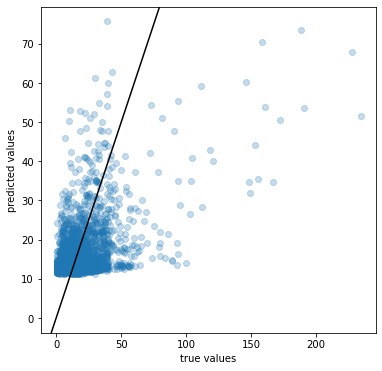

In [64]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

In [65]:
model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

Epoch 1/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 151.4307 - mean_absolute_error: 8.3090 - r2_score: 0.1887 - root_mean_squared_error: 12.2968
Epoch 2/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 147.5697 - mean_absolute_error: 8.2752 - r2_score: 0.1962 - root_mean_squared_error: 12.1406
Epoch 3/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 149.7340 - mean_absolute_error: 8.2816 - r2_score: 0.1883 - root_mean_squared_error: 12.2325
Epoch 4/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 156.1136 - mean_absolute_error: 8.4049 - r2_score: 0.1742 - root_mean_squared_error: 12.4895
Epoch 5/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 143.4311 - mean_absolute_error: 8.2682 - r2_score: 0.1678 - root_mean_squared_error: 11.9714
Epoch 6/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 146.2209 - mean_absolute_error: 8.2201 - r2_score: 0.2094 - root_mean_squared_error: 12.0792
Epoch 7/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 151.9742 - m

[115.85619354248047,
 10.763651847839355,
 0.4761952757835388,
 6.8052873611450195]

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
RMSE: 115.8561923721946
R^2: 0.47619521905198026
bias: 6.805288093912781
RPIQ: 0.08692464868193832


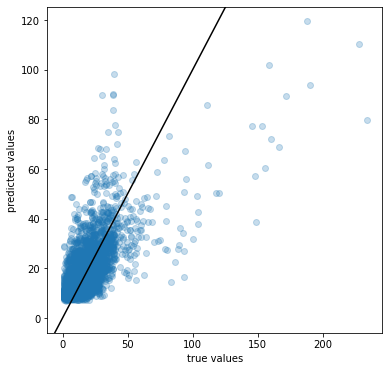

In [66]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# WATER RETENTION

## KSSL MIR

In [223]:
columns = []
columns.append('wr.1500kPa_usda.a417_w.pct')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,wr.1500kPa_usda.a417_w.pct,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,14.53674,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,16.20553,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,20.42360,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,17.88413,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,15.64417,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,8.73656,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,7.47283,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,11.14600,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,15.84158,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [224]:
X = pd.DataFrame(data=data[mir_columns], columns=mir_columns)
y = data['wr.1500kPa_usda.a417_w.pct']
feature_columns = X.shape[1]

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [226]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.InputLayer(shape=(feature_columns, 1)),
    
    tf.keras.layers.Conv1D(filters=32, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    
    tf.keras.layers.Conv1D(filters=64, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=128, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=256, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=100, activation='relu'),
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(units=1, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score(), tf.keras.metrics.MeanAbsoluteError()])

In [227]:
model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

Epoch 1/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 71s 147ms/step - loss: 198.9138 - mean_absolute_error: 7.8648 - r2_score: 0.2624 - root_mean_squared_error: 13.9714
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 74s 156ms/step - loss: 78.0888 - mean_absolute_error: 5.0819 - r2_score: 0.7110 - root_mean_squared_error: 8.8210
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 74s 156ms/step - loss: 73.9237 - mean_absolute_error: 4.7769 - r2_score: 0.7261 - root_mean_squared_error: 8.5341
Epoch 4/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 74s 156ms/step - loss: 66.2492 - mean_absolute_error: 4.3501 - r2_score: 0.7550 - root_mean_squared_error: 8.1322
Epoch 5/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 75s 157ms/step - loss: 59.9088 - mean_absolute_error: 4.1423 - r2_score: 0.7727 - root_mean_squared_error: 7.7383
Epoch 6/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 74s 157ms/step - loss: 55.7874 - mean_absolute_error: 4.0314 - r2_score: 0.7917 - root_mean_squared_error: 7.4607
Epoch 7/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 75s 158ms/step - loss: 66.1783 - m

[48.99102783203125, 6.999359130859375, 0.8039320707321167, 4.4443769454956055]

315/315 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step
RMSE: 48.99103638721979
R^2: 0.8039321799742133
bias: 4.444378468934677
RPIQ: 0.11359963565547257


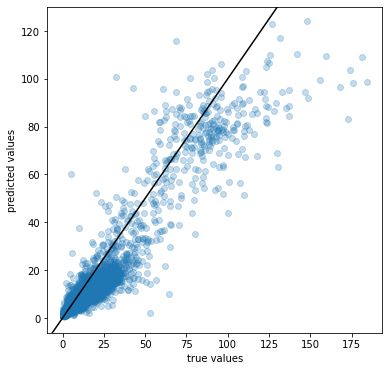

In [228]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# NITROGEN

## KSSL MIR

In [229]:
columns = []
columns.append('n.tot_usda.a623_w.pct')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,n.tot_usda.a623_w.pct,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,0.30898,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,0.15974,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,0.08458,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,0.08744,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,0.03378,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,0.06953,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,0.07152,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,0.08750,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,0.05180,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [230]:
X = pd.DataFrame(data=data[mir_columns], columns=mir_columns)
y = data['n.tot_usda.a623_w.pct']
feature_columns = X.shape[1]

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [232]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.InputLayer(shape=(feature_columns, 1)),
    
    tf.keras.layers.Conv1D(filters=32, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    
    tf.keras.layers.Conv1D(filters=64, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=128, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=256, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=100, activation='relu'),
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(units=1, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score(), tf.keras.metrics.MeanAbsoluteError()])

In [233]:
model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

Epoch 1/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 141s 155ms/step - loss: 0.2862 - mean_absolute_error: 0.2194 - r2_score: 0.4319 - root_mean_squared_error: 0.5291
Epoch 2/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 142s 159ms/step - loss: 0.1601 - mean_absolute_error: 0.1247 - r2_score: 0.6733 - root_mean_squared_error: 0.3908
Epoch 3/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 142s 158ms/step - loss: 0.1914 - mean_absolute_error: 0.1218 - r2_score: 0.6396 - root_mean_squared_error: 0.4276
Epoch 4/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 141s 157ms/step - loss: 0.1794 - mean_absolute_error: 0.1262 - r2_score: 0.6479 - root_mean_squared_error: 0.4130
Epoch 5/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 142s 158ms/step - loss: 0.0818 - mean_absolute_error: 0.1093 - r2_score: 0.8046 - root_mean_squared_error: 0.2818
Epoch 6/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 142s 158ms/step - loss: 0.2138 - mean_absolute_error: 0.1195 - r2_score: 0.6416 - root_mean_squared_error: 0.4409
Epoch 7/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 141s 157ms/step - loss: 0.1071 - mea

[0.05252271518111229,
 0.22917835414409637,
 0.8678483963012695,
 0.0876954048871994]

599/599 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step
RMSE: 0.052522711682824366
R^2: 0.8678484153409285
bias: 0.08769542084973103
RPIQ: 3.7879409080571755


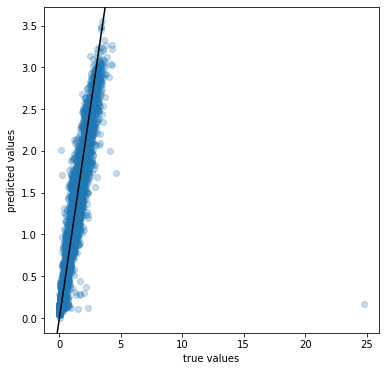

In [234]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## KSSL VisNIR

In [235]:
columns = []
columns.append('n.tot_usda.a623_w.pct')
for column in visnir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,n.tot_usda.a623_w.pct,scan_visnir.350_ref,scan_visnir.352_ref,scan_visnir.354_ref,scan_visnir.356_ref,scan_visnir.358_ref,scan_visnir.360_ref,scan_visnir.362_ref,scan_visnir.364_ref,scan_visnir.366_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
18152,0.20601,0.077421,0.072910,0.073691,0.072176,0.074600,0.072097,0.073046,0.074168,0.072839,...,0.365855,0.365018,0.364296,0.363637,0.363152,0.362660,0.362011,0.361533,0.361310,0.361050
18153,0.22330,0.066058,0.062893,0.064084,0.061675,0.063588,0.062408,0.064102,0.062895,0.062829,...,0.242379,0.242028,0.241381,0.240597,0.240109,0.239873,0.239396,0.238724,0.238408,0.237969
18154,0.14873,0.077325,0.075455,0.076815,0.074597,0.073646,0.074608,0.073519,0.073493,0.073147,...,0.319659,0.318645,0.317855,0.317300,0.316689,0.316115,0.315196,0.314604,0.314429,0.313930
18155,0.10968,0.097102,0.091112,0.091832,0.093932,0.092380,0.090129,0.092447,0.092410,0.090647,...,0.385901,0.385142,0.384454,0.383486,0.382602,0.381834,0.381084,0.380598,0.380165,0.379788
18156,0.03284,0.119604,0.116179,0.112785,0.113860,0.113838,0.110856,0.112768,0.113648,0.112623,...,0.460175,0.458923,0.457928,0.457054,0.456041,0.455239,0.454524,0.453849,0.453163,0.452622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95471,0.08415,0.109567,0.113936,0.108543,0.108809,0.109337,0.092460,0.103661,0.096557,0.103735,...,0.489457,0.488424,0.487792,0.486853,0.485865,0.485218,0.484344,0.483869,0.484000,0.483605
95472,0.15948,0.106995,0.085072,0.085937,0.089104,0.085709,0.089627,0.082092,0.082001,0.088625,...,0.430683,0.429715,0.428952,0.428255,0.427420,0.426812,0.426288,0.425851,0.425760,0.425386
95473,0.07306,0.100045,0.090723,0.094300,0.096284,0.084119,0.091379,0.085682,0.086158,0.094520,...,0.456814,0.455788,0.455203,0.454340,0.453526,0.452545,0.451923,0.451796,0.451511,0.451213
95474,0.47058,0.069460,0.074518,0.072117,0.062740,0.069880,0.067223,0.064717,0.065808,0.067471,...,0.278715,0.278108,0.277275,0.276336,0.275976,0.275623,0.274905,0.274243,0.273711,0.273456


In [236]:
X = pd.DataFrame(data=data[visnir_columns], columns=visnir_columns)
y = data['n.tot_usda.a623_w.pct']
feature_columns = X.shape[1]

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [238]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.InputLayer(shape=(feature_columns, 1)),
    
    tf.keras.layers.Conv1D(filters=32, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    
    tf.keras.layers.Conv1D(filters=64, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=128, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=256, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=100, activation='relu'),
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(units=1, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score(), tf.keras.metrics.MeanAbsoluteError()])

In [239]:
model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

Epoch 1/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - loss: 0.4582 - mean_absolute_error: 0.4551 - r2_score: 0.1828 - root_mean_squared_error: 0.6698
Epoch 2/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.1711 - mean_absolute_error: 0.2531 - r2_score: 0.6960 - root_mean_squared_error: 0.4136
Epoch 3/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.1573 - mean_absolute_error: 0.2406 - r2_score: 0.7232 - root_mean_squared_error: 0.3965
Epoch 4/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.1453 - mean_absolute_error: 0.2278 - r2_score: 0.7304 - root_mean_squared_error: 0.3810
Epoch 5/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - loss: 0.1364 - mean_absolute_error: 0.2218 - r2_score: 0.7562 - root_mean_squared_error: 0.3692
Epoch 6/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.1341 - mean_absolute_error: 0.2216 - r2_score: 0.7678 - root_mean_squared_error: 0.3661
Epoch 7/20
233/233 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.1278 - mean_absolute_err

[0.09124819189310074,
 0.3020731508731842,
 0.8428285121917725,
 0.1769605278968811]

155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
RMSE: 0.09124820529100452
R^2: 0.8428284623382731
bias: 0.1769605722030617
RPIQ: 9.33803061600296


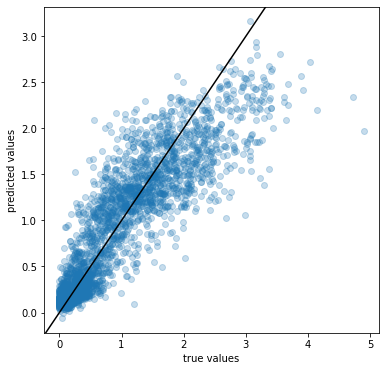

In [240]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## LUCAS VisNIR

In [245]:
columns = []
columns.append('n.tot_iso.11261_w.pct')
for column in visnir_columns[25:]:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'LUCAS.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,n.tot_iso.11261_w.pct,scan_visnir.400_ref,scan_visnir.402_ref,scan_visnir.404_ref,scan_visnir.406_ref,scan_visnir.408_ref,scan_visnir.410_ref,scan_visnir.412_ref,scan_visnir.414_ref,scan_visnir.416_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
95476,0.53,0.147331,0.137725,0.129233,0.122038,0.116199,0.111652,0.108249,0.105793,0.104077,...,0.281269,0.281066,0.280881,0.280715,0.280566,0.280457,0.280389,0.280337,0.280321,0.280355
95477,0.21,0.196777,0.181492,0.168124,0.156923,0.147937,0.141014,0.135856,0.132139,0.129554,...,0.380431,0.379638,0.378879,0.378168,0.377544,0.377009,0.376543,0.376147,0.375830,0.375504
95478,0.14,0.215656,0.196448,0.179823,0.165995,0.154917,0.146328,0.139857,0.135119,0.131746,...,0.379886,0.378946,0.378047,0.377186,0.376361,0.375612,0.374935,0.374315,0.373759,0.373110
95479,0.16,0.200385,0.185616,0.172716,0.161951,0.153353,0.146730,0.141793,0.138226,0.135729,...,0.260330,0.259418,0.258505,0.257603,0.256744,0.255934,0.255173,0.254467,0.253815,0.253045
95480,0.26,0.211138,0.193811,0.178648,0.165877,0.155546,0.147513,0.141501,0.137160,0.134128,...,0.401367,0.400499,0.399693,0.398964,0.398307,0.397749,0.397298,0.396927,0.396609,0.396239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135646,0.13,0.134596,0.123176,0.113366,0.105305,0.098835,0.093753,0.089851,0.086902,0.084672,...,0.238452,0.237691,0.236922,0.236146,0.235420,0.234750,0.234165,0.233656,0.233179,0.232499
135647,0.13,0.146498,0.133158,0.121717,0.112330,0.104832,0.098949,0.094392,0.090915,0.088276,...,0.286538,0.285587,0.284676,0.283814,0.282987,0.282239,0.281584,0.280977,0.280416,0.279644
135648,0.09,0.141685,0.130641,0.121164,0.113433,0.107294,0.102510,0.098863,0.096139,0.094123,...,0.234215,0.233401,0.232597,0.231818,0.231075,0.230400,0.229796,0.229211,0.228687,0.228053
135649,0.06,0.142072,0.131503,0.122369,0.114908,0.109030,0.104478,0.101000,0.098400,0.096492,...,0.289042,0.288496,0.287980,0.287488,0.287001,0.286541,0.286125,0.285737,0.285374,0.284905


In [246]:
X = pd.DataFrame(data=data[visnir_columns[25:]], columns=visnir_columns[25:])
y = data['n.tot_iso.11261_w.pct']
feature_columns = X.shape[1]

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [248]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.InputLayer(shape=(feature_columns, 1)),
    
    tf.keras.layers.Conv1D(filters=32, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    
    tf.keras.layers.Conv1D(filters=64, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=128, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=256, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=100, activation='relu'),
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(units=1, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score(), tf.keras.metrics.MeanAbsoluteError()])

In [249]:
model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

Epoch 1/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - loss: 0.1090 - mean_absolute_error: 0.1832 - r2_score: 0.1811 - root_mean_squared_error: 0.3275
Epoch 2/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 0.0531 - mean_absolute_error: 0.1398 - r2_score: 0.6004 - root_mean_squared_error: 0.2302
Epoch 3/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - loss: 0.0501 - mean_absolute_error: 0.1369 - r2_score: 0.6256 - root_mean_squared_error: 0.2238
Epoch 4/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 0.0486 - mean_absolute_error: 0.1339 - r2_score: 0.6545 - root_mean_squared_error: 0.2199
Epoch 5/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - loss: 0.0479 - mean_absolute_error: 0.1331 - r2_score: 0.6534 - root_mean_squared_error: 0.2187
Epoch 6/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - loss: 0.0464 - mean_absolute_error: 0.1324 - r2_score: 0.6489 - root_mean_squared_error: 0.2153
Epoch 7/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - loss: 0.0465 - mean_absolute_err

[0.03759096562862396,
 0.19388389587402344,
 0.7284915447235107,
 0.11848512291908264]

314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
RMSE: 0.037590972042948145
R^2: 0.7284916221160913
bias: 0.11848507709092042
RPIQ: 2.9840165329690858


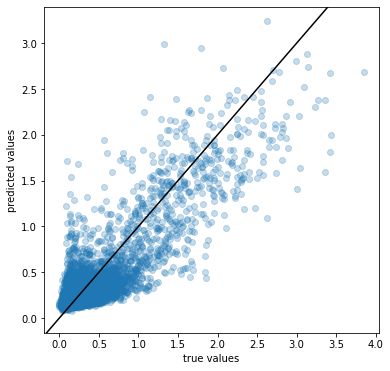

In [250]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# CALCIUM

## KSSL MIR

In [251]:
columns = []
columns.append('ca.ext_usda.a722_cmolc.kg')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,ca.ext_usda.a722_cmolc.kg,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,13.88126,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,15.72011,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,21.14528,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,29.25669,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,34.91432,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,40.35338,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,40.39062,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,25.29846,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,57.57273,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [252]:
X = pd.DataFrame(data=data[mir_columns], columns=mir_columns)
y = data['ca.ext_usda.a722_cmolc.kg']
feature_columns = X.shape[1]

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [254]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.InputLayer(shape=(feature_columns, 1)),
    
    tf.keras.layers.Conv1D(filters=32, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    
    tf.keras.layers.Conv1D(filters=64, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=128, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=256, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=100, activation='relu'),
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(units=1, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score(), tf.keras.metrics.MeanAbsoluteError()])

In [255]:
model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

Epoch 1/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 104s 155ms/step - loss: 812.4594 - mean_absolute_error: 15.9561 - r2_score: 0.2972 - root_mean_squared_error: 28.0400
Epoch 2/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 99s 158ms/step - loss: 266.9795 - mean_absolute_error: 8.6800 - r2_score: 0.7569 - root_mean_squared_error: 16.3359
Epoch 3/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 99s 159ms/step - loss: 232.0524 - mean_absolute_error: 8.0275 - r2_score: 0.7871 - root_mean_squared_error: 15.2255
Epoch 4/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 100s 160ms/step - loss: 221.7657 - mean_absolute_error: 7.8002 - r2_score: 0.8014 - root_mean_squared_error: 14.8897
Epoch 5/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 100s 159ms/step - loss: 195.4722 - mean_absolute_error: 7.2629 - r2_score: 0.8247 - root_mean_squared_error: 13.9616
Epoch 6/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 100s 160ms/step - loss: 215.2218 - mean_absolute_error: 7.6404 - r2_score: 0.8146 - root_mean_squared_error: 14.6233
Epoch 7/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 100s 160ms/step - l

[101.44157409667969, 10.071821212768555, 0.903255820274353, 4.812070369720459]

416/416 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step
RMSE: 101.44155061052832
R^2: 0.9032559351765396
bias: 4.812068564542321
RPIQ: 0.20200848295245116


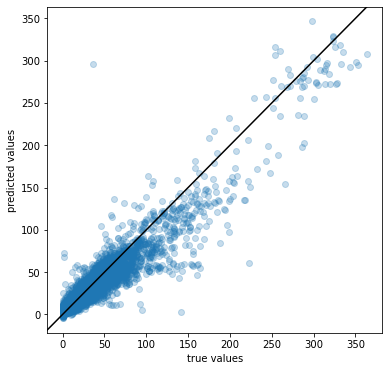

In [256]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# POTASSIUM

## KSSL MIR

In [257]:
columns = []
columns.append('k.ext_usda.a725_cmolc.kg')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,k.ext_usda.a725_cmolc.kg,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,0.41300,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,0.28625,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,0.42491,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,0.44901,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,0.37489,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,1.61695,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,1.20224,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,1.49763,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,2.68437,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [258]:
X = pd.DataFrame(data=data[mir_columns], columns=mir_columns)
y = data['k.ext_usda.a725_cmolc.kg']
feature_columns = X.shape[1]

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [260]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.InputLayer(shape=(feature_columns, 1)),
    
    tf.keras.layers.Conv1D(filters=32, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    
    tf.keras.layers.Conv1D(filters=64, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=128, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=256, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=100, activation='relu'),
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(units=1, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score(), tf.keras.metrics.MeanAbsoluteError()])

In [261]:
model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

Epoch 1/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 100s 157ms/step - loss: 1.0603 - mean_absolute_error: 0.5421 - r2_score: 0.0363 - root_mean_squared_error: 1.0284
Epoch 2/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 101s 163ms/step - loss: 0.8300 - mean_absolute_error: 0.4700 - r2_score: 0.1879 - root_mean_squared_error: 0.9100
Epoch 3/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 101s 161ms/step - loss: 0.8352 - mean_absolute_error: 0.4506 - r2_score: 0.2490 - root_mean_squared_error: 0.9097
Epoch 4/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 100s 161ms/step - loss: 0.8425 - mean_absolute_error: 0.4441 - r2_score: 0.2832 - root_mean_squared_error: 0.9152
Epoch 5/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 100s 160ms/step - loss: 0.6597 - mean_absolute_error: 0.4121 - r2_score: 0.3537 - root_mean_squared_error: 0.8099
Epoch 6/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 101s 161ms/step - loss: 0.6465 - mean_absolute_error: 0.4067 - r2_score: 0.3647 - root_mean_squared_error: 0.8022
Epoch 7/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 100s 160ms/step - loss: 0.6275 - mea

[0.6064038872718811,
 0.7787193655967712,
 0.46529918909072876,
 0.37094637751579285]

416/416 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step
RMSE: 0.6064038190848285
R^2: 0.4652988191846673
bias: 0.37094648411613135
RPIQ: 0.928124995934614


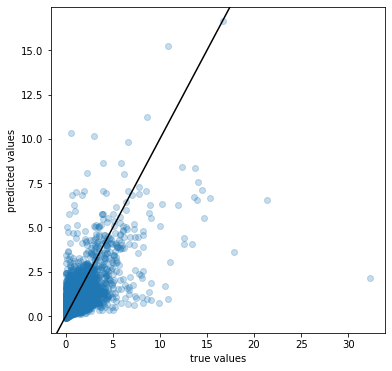

In [262]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

## LUCAS VisNIR

In [67]:
columns = []
columns.append('k.ext_usda.a725_cmolc.kg')
for column in visnir_columns[25:]:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'LUCAS.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,k.ext_usda.a725_cmolc.kg,scan_visnir.400_ref,scan_visnir.402_ref,scan_visnir.404_ref,scan_visnir.406_ref,scan_visnir.408_ref,scan_visnir.410_ref,scan_visnir.412_ref,scan_visnir.414_ref,scan_visnir.416_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
95476,0.449639,0.147331,0.137725,0.129233,0.122038,0.116199,0.111652,0.108249,0.105793,0.104077,...,0.281269,0.281066,0.280881,0.280715,0.280566,0.280457,0.280389,0.280337,0.280321,0.280355
95477,0.635327,0.196777,0.181492,0.168124,0.156923,0.147937,0.141014,0.135856,0.132139,0.129554,...,0.380431,0.379638,0.378879,0.378168,0.377544,0.377009,0.376543,0.376147,0.375830,0.375504
95478,2.512149,0.215656,0.196448,0.179823,0.165995,0.154917,0.146328,0.139857,0.135119,0.131746,...,0.379886,0.378946,0.378047,0.377186,0.376361,0.375612,0.374935,0.374315,0.373759,0.373110
95479,1.427695,0.200385,0.185616,0.172716,0.161951,0.153353,0.146730,0.141793,0.138226,0.135729,...,0.260330,0.259418,0.258505,0.257603,0.256744,0.255934,0.255173,0.254467,0.253815,0.253045
95480,2.041537,0.211138,0.193811,0.178648,0.165877,0.155546,0.147513,0.141501,0.137160,0.134128,...,0.401367,0.400499,0.399693,0.398964,0.398307,0.397749,0.397298,0.396927,0.396609,0.396239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135646,5.744539,0.134596,0.123176,0.113366,0.105305,0.098835,0.093753,0.089851,0.086902,0.084672,...,0.238452,0.237691,0.236922,0.236146,0.235420,0.234750,0.234165,0.233656,0.233179,0.232499
135647,3.367947,0.146498,0.133158,0.121717,0.112330,0.104832,0.098949,0.094392,0.090915,0.088276,...,0.286538,0.285587,0.284676,0.283814,0.282987,0.282239,0.281584,0.280977,0.280416,0.279644
135648,2.450765,0.141685,0.130641,0.121164,0.113433,0.107294,0.102510,0.098863,0.096139,0.094123,...,0.234215,0.233401,0.232597,0.231818,0.231075,0.230400,0.229796,0.229211,0.228687,0.228053
135649,2.613944,0.142072,0.131503,0.122369,0.114908,0.109030,0.104478,0.101000,0.098400,0.096492,...,0.289042,0.288496,0.287980,0.287488,0.287001,0.286541,0.286125,0.285737,0.285374,0.284905


In [68]:
X = pd.DataFrame(data=data[visnir_columns[25:]], columns=visnir_columns[25:])
y = data['k.ext_usda.a725_cmolc.kg']
feature_columns = X.shape[1]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [70]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.InputLayer(shape=(feature_columns, 1)),
    
    tf.keras.layers.Conv1D(filters=32, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    
    tf.keras.layers.Conv1D(filters=64, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=128, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=256, kernel_size=10, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=100, activation='relu'),
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(units=1, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score(), tf.keras.metrics.MeanAbsoluteError()])

In [71]:
model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

Epoch 1/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - loss: 1.3701 - mean_absolute_error: 0.6731 - r2_score: -0.0664 - root_mean_squared_error: 1.1685
Epoch 2/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - loss: 1.2423 - mean_absolute_error: 0.6469 - r2_score: -0.0102 - root_mean_squared_error: 1.1100
Epoch 3/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: 1.5040 - mean_absolute_error: 0.6608 - r2_score: 0.0078 - root_mean_squared_error: 1.2098
Epoch 4/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: 1.2006 - mean_absolute_error: 0.6071 - r2_score: 0.0734 - root_mean_squared_error: 1.0922
Epoch 5/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: 1.3461 - mean_absolute_error: 0.6076 - r2_score: 0.0801 - root_mean_squared_error: 1.1569
Epoch 6/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: 1.1223 - mean_absolute_error: 0.5950 - r2_score: 0.1007 - root_mean_squared_error: 1.0587
Epoch 7/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - loss: 1.3194 - mean_absolute_e

[1.0119229555130005, 1.005943775177002, 0.15374892950057983, 0.520048201084137]

314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
RMSE: 1.0119228886661442
R^2: 0.15374867109082435
bias: 0.5200481565474379
RPIQ: 0.5504157397277848


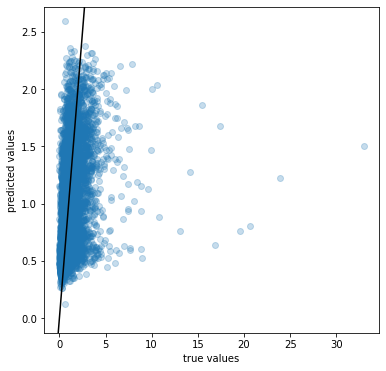

In [72]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

In [73]:
model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

Epoch 1/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - loss: 1.1174 - mean_absolute_error: 0.5644 - r2_score: 0.1458 - root_mean_squared_error: 1.0542
Epoch 2/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: 1.1499 - mean_absolute_error: 0.5629 - r2_score: 0.1513 - root_mean_squared_error: 1.0693
Epoch 3/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: 1.1467 - mean_absolute_error: 0.5614 - r2_score: 0.1502 - root_mean_squared_error: 1.0686
Epoch 4/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: 1.3115 - mean_absolute_error: 0.5654 - r2_score: 0.1408 - root_mean_squared_error: 1.1393
Epoch 5/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: 0.9632 - mean_absolute_error: 0.5433 - r2_score: 0.1838 - root_mean_squared_error: 0.9786
Epoch 6/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: 1.1453 - mean_absolute_error: 0.5567 - r2_score: 0.1573 - root_mean_squared_error: 1.0675
Epoch 7/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: 1.1003 - mean_absolute_err

[0.9535166621208191,
 0.9764817953109741,
 0.20259296894073486,
 0.5501523017883301]

314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
RMSE: 0.9535164567202614
R^2: 0.2025928282935513
bias: 0.5501522175443682
RPIQ: 0.8338764204194656


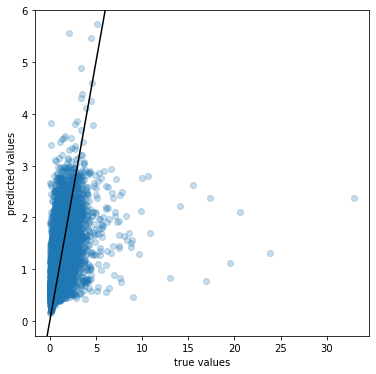

In [74]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# IRON

## KSSL MIR

In [272]:
columns = []
columns.append('fe.dith_usda.a66_w.pct')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,fe.dith_usda.a66_w.pct,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,1.09028,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,1.51359,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,2.41690,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,1.73210,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,1.37132,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,0.36524,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,0.26761,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,0.40614,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,0.40668,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [273]:
X = pd.DataFrame(data=data[mir_columns], columns=mir_columns)
y = data['fe.dith_usda.a66_w.pct']
feature_columns = X.shape[1]

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [275]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.InputLayer(shape=(feature_columns, 1)),
    
    tf.keras.layers.Conv1D(filters=32, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    
    tf.keras.layers.Conv1D(filters=64, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=128, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=256, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=100, activation='relu'),
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(units=1, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score(), tf.keras.metrics.MeanAbsoluteError()])

In [276]:
model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

Epoch 1/20
365/365 ━━━━━━━━━━━━━━━━━━━━ 57s 152ms/step - loss: 1.8714 - mean_absolute_error: 0.8337 - r2_score: 0.1801 - root_mean_squared_error: 1.3656
Epoch 2/20
365/365 ━━━━━━━━━━━━━━━━━━━━ 58s 159ms/step - loss: 1.2385 - mean_absolute_error: 0.6609 - r2_score: 0.5321 - root_mean_squared_error: 1.1077
Epoch 3/20
365/365 ━━━━━━━━━━━━━━━━━━━━ 58s 160ms/step - loss: 0.9998 - mean_absolute_error: 0.5991 - r2_score: 0.5922 - root_mean_squared_error: 0.9964
Epoch 4/20
365/365 ━━━━━━━━━━━━━━━━━━━━ 58s 160ms/step - loss: 0.8582 - mean_absolute_error: 0.5655 - r2_score: 0.6536 - root_mean_squared_error: 0.9260
Epoch 5/20
365/365 ━━━━━━━━━━━━━━━━━━━━ 58s 159ms/step - loss: 0.8345 - mean_absolute_error: 0.5468 - r2_score: 0.6847 - root_mean_squared_error: 0.9123
Epoch 6/20
365/365 ━━━━━━━━━━━━━━━━━━━━ 58s 160ms/step - loss: 0.7550 - mean_absolute_error: 0.5294 - r2_score: 0.6914 - root_mean_squared_error: 0.8685
Epoch 7/20
365/365 ━━━━━━━━━━━━━━━━━━━━ 58s 159ms/step - loss: 0.6681 - mean_absol

[0.5556032657623291,
 0.7453879714012146,
 0.7819699645042419,
 0.4337694048881531]

244/244 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step
RMSE: 0.5556032843590194
R^2: 0.7819699518873521
bias: 0.4337694413454501
RPIQ: 1.5882955129048988


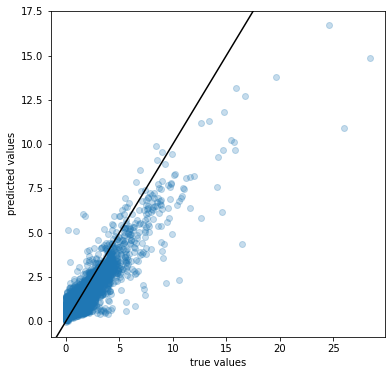

In [277]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()

# MAGNESIUM

## KSSL MIR

In [278]:
columns = []
columns.append('mg.ext_usda.a724_cmolc.kg')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data

,mg.ext_usda.a724_cmolc.kg,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
7888,4.15291,1.53298,1.53538,1.53785,1.54230,1.55475,1.56113,1.56639,1.56883,1.57040,...,0.20740,0.20705,0.20685,0.20658,0.20625,0.20585,0.20550,0.20518,0.20490,0.20453
7889,5.48653,1.61970,1.62442,1.62998,1.63690,1.65104,1.65842,1.66533,1.66893,1.67101,...,0.27185,0.27135,0.27100,0.27060,0.27008,0.26955,0.26910,0.26860,0.26818,0.26770
7890,8.42312,1.64455,1.65272,1.66220,1.67142,1.68751,1.69640,1.70526,1.71150,1.71739,...,0.26415,0.26353,0.26303,0.26250,0.26185,0.26112,0.26048,0.25983,0.25925,0.25858
7891,8.55486,1.64675,1.65338,1.66120,1.66968,1.68572,1.69521,1.70517,1.71282,1.72002,...,0.25257,0.25195,0.25145,0.25095,0.25030,0.24963,0.24900,0.24840,0.24778,0.24713
7892,6.99786,1.55890,1.56568,1.57338,1.58298,1.60214,1.61223,1.62261,1.63028,1.63687,...,0.21915,0.21858,0.21815,0.21763,0.21695,0.21633,0.21570,0.21507,0.21457,0.21395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84696,1.45291,1.56572,1.57290,1.58143,1.59115,1.60878,1.61956,1.63250,1.64261,1.65014,...,0.23532,0.23473,0.23435,0.23388,0.23323,0.23265,0.23207,0.23155,0.23102,0.23045
84697,1.36408,1.53893,1.54442,1.55180,1.56188,1.58169,1.59189,1.60342,1.61288,1.62186,...,0.24528,0.24475,0.24435,0.24385,0.24325,0.24267,0.24207,0.24155,0.24100,0.24045
84698,2.18885,1.59602,1.60335,1.61100,1.61973,1.63796,1.64914,1.66180,1.67188,1.67988,...,0.22235,0.22180,0.22142,0.22098,0.22038,0.21978,0.21918,0.21862,0.21807,0.21750
84699,5.81614,1.65605,1.66487,1.67438,1.68482,1.70394,1.71455,1.72700,1.73710,1.74515,...,0.21510,0.21445,0.21395,0.21340,0.21272,0.21205,0.21140,0.21077,0.21012,0.20950


In [279]:
X = pd.DataFrame(data=data[mir_columns], columns=mir_columns)
y = data['mg.ext_usda.a724_cmolc.kg']
feature_columns = X.shape[1]

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [281]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.InputLayer(shape=(feature_columns, 1)),
    
    tf.keras.layers.Conv1D(filters=32, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2),
    
    tf.keras.layers.Conv1D(filters=64, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=128, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Conv1D(filters=256, kernel_size=20, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=5),
    
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=100, activation='relu'),
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(units=1, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score(), tf.keras.metrics.MeanAbsoluteError()])

In [282]:
model.fit(X_train, y_train, epochs=20, batch_size=64)
model.evaluate(X_test, y_test)

Epoch 1/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 101s 158ms/step - loss: 66.9764 - mean_absolute_error: 4.5299 - r2_score: 0.0654 - root_mean_squared_error: 8.1670
Epoch 2/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 100s 161ms/step - loss: 47.5106 - mean_absolute_error: 3.5142 - r2_score: 0.3237 - root_mean_squared_error: 6.8889
Epoch 3/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 100s 161ms/step - loss: 38.8912 - mean_absolute_error: 3.2500 - r2_score: 0.4772 - root_mean_squared_error: 6.2305
Epoch 4/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 101s 161ms/step - loss: 34.1690 - mean_absolute_error: 2.9955 - r2_score: 0.5255 - root_mean_squared_error: 5.8347
Epoch 5/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 101s 162ms/step - loss: 32.4983 - mean_absolute_error: 2.9595 - r2_score: 0.5783 - root_mean_squared_error: 5.6963
Epoch 6/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 101s 162ms/step - loss: 29.2713 - mean_absolute_error: 2.8098 - r2_score: 0.5904 - root_mean_squared_error: 5.4045
Epoch 7/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 101s 161ms/step - loss: 26.061

[15.116473197937012, 3.887990951538086, 0.773228108882904, 2.0818698406219482]

416/416 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step
RMSE: 15.11646611983601
R^2: 0.7732282507925753
bias: 2.081869436868542
RPIQ: 0.31615719806283193


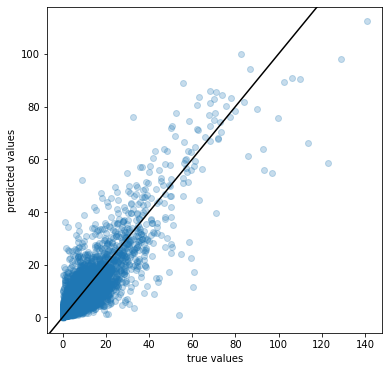

In [283]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
bias = mean_absolute_error(y_test, y_pred)

q3, q1 = np.percentile(y_pred, [75 ,25])
iqr = q3 - q1
rpiq = iqr/rmse

print('RMSE:', np.mean(rmse))
print('R^2:', np.mean(r2))
print('bias:', np.mean(bias))
print('RPIQ:', np.mean(rpiq))

plt.figure(figsize=(6,6))
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.scatter(y_test, y_pred, alpha=0.25)
plt.axline(xy1=(0,0), xy2=(1,1), color='k')
plt.show()